<a href="https://colab.research.google.com/github/subasu31/mean_reversion2/blob/master/optimal_long_short_strat_mean_rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Optimal long-short trading strategy in a mean-reverting environment

Let us consider an asset whose prices follow a discrete Ornstein–Uhlenbeck process. We wish to explore optimal log-short trading rule/strategy for this price process.
We start by introducing few terminologies.
A 4-barrier **Single long-short trading strategy**, or simply **single-strat**,  is parametrized by a strictly increasing quadruple 
$S \equiv (b_\text{OL},b_\text{CL},b_\text{CS},b_\text{OS})$ i.e.
$$
b_\text{OL} < b_\text{CL} < b_\text{CS} < b_\text{OS}
$$


The corresponding trading strategy is as follows: if and when the asset price 


* breaches barrier $b_\text{OL}$ from above, a long position is opened
* breaches barrier $b_\text{CL}$ from below, an existing long position is closed
* breaches barrier $b_\text{OS}$ from below, a short position is opened
* breaches barrier $b_\text{CS}$ from above, an exising short position is closed


**Multiple long-short trading strategy**, or simply **multi-strat** is parametrized by the following
* a finite sequence of single strategies $(S_1,\dots,S_M)$
* a quantity vector of same length $(q_1,\dots,q_M)$

This multi-strategy involves running $M$ single strategies simultaneously: single strategy $S_1$with quantity $q_1$, single strategy $S_2$with quantity $q_2$ and so on.

##  Quantity vector optimization
Given a single strategy sequence $(S_1, \ldots,S_M)$ and a maximum holding period, we compute the optimal single-strat weightings as follows:
* generate $N$ Monte Carlo paths once
* calculate the corresponding $N \times M$ pnl matrix $P$, where the $i^{th}$ row and the $j^{th}$ column element represents the pnl attained on the $i^{th}$ path running the $j^{th}$ single-strat
* minimize 

$$
-\text{Sharpe Ratio}(Pq) \equiv - \frac{\text{mean}(Pq)}{\text{stdev}(Pq)} 
$$

where $q \equiv (q_1,\dots,q_M)$ subject to $0 < q_i, \forall i=1,\ldots,M$

In order to keep computational complexity manageable, we shall now focus on the following **symmetric** family of single and multi-strategies as explained below. We start by fixing a pair $(\text{center=}C, \text{unit=}U)$ and this is used as follows: short barriers and long barriers are symmetrically placed around center $C$ in units of $U$ . More precisely, given a pair of positive integers $(a,b)$, we associate a 4-barrier single strategy, placed symmetrically around the center $C$ as follows:

$$
S(a,b) 
\equiv C + U( -b,-a,a,b )
\equiv ( C-bU,C-aU,C+aU,C+bU )
$$

Similarly, given a positive integer $a$ and strictly increasing positive integral sequence $[b_1, b_2, \ldots, b_M]$ with $a < b_1$, define a multi-strategy as follows

$$
M(a,[b_1, b_2, \ldots, b_M]) \equiv 
[S(a,b_1),S(a,b_2),\ldots, S(a,b_M)]
$$

For example: assuming $(C,U)= (1,2)$
$$
S(2, 7)= C+U(-7,-2,2,7)=1+2(-7,-2,2,7)=(-13,-3,5,15)
\\
M(2, [5,7,10])= [S(2,5), S(2,7), S(2,10)]
$$


The findings of this work is summarized in the following table showing the best Sharpe ratios for various OU processes (rows) and for various strategy families (last three columns).
In particular, the three strategy families considered are (S0 indicates initial asset value) 
* mulit-strat with equal weights
* multi-strat with optimal weights that maximizes Sharpe ratio
* single-strat that maximizes Sharpe ratio



|    |   max_hp |   # MC paths |   unit |   center |   S0 |   level |   half_life |    multi-strat (equal wt) |   multi-strat (optimal wt) |    single -strat|
|----|----------|---------|--------|----------|------|---------|-------------|---------------------|---------------------|-----------------|
|  0 |      100 |   10000 |   0.25 |     -2.5 |   -5 |       0 |           5 |             3.54801 |             3.72111 |         2.83986 |
|  1 |       |    |    |      |   |        |          10 |             2.68661 |             2.80803 |         2.17997 |
|  2 |       |    |    |      |   |        |          25 |             1.67135 |             1.71623 |         1.45324 |
|  3 |       |    |    |      0   |    0 |       0 |           5 |             4.55587 |             4.976   |         3.87793 |
|  4 |       |    |    |        |    |      |          10 |             3.50295 |             3.73915 |         2.79819 |
|  5 |      |    |    |        |     |       |          25 |             1.77369 |             1.83525 |         1.54706 |
|  6 |       |    |    |      2.5 |    5 |       0 |           5 |             3.53549 |             3.70792 |         2.90956 |
|  7 |       |    |    |       |     |        |          10 |             2.6591  |             2.80052 |         2.19161 |
|  8 |       |    |    |       |    |        |          25 |             1.6874  |             1.7469  |         1.46789 |


Few comments are in order:
* **optimally weighted multi-strat always has the highest Sharpe rario comapred to the other two**

* irrespective of the startegy chosen, weaker the mean-reversion, or equivalently longer the mean-reversion half-life, lower the Sharpe ratio, as one would expect.

* symmetry around long-term mean level: for any given half-life, sets of Sharpe ratios corresponding to initial asset values S0=-5 and S0=+5 are approximately the same. Sharpe ratio peaks around S0=0, all other factors remaining the same.

In [0]:
from datetime import datetime as dt, timedelta

#--------------
# 
#--------------
def get_time_diff( ts, format_str='elapsed time = {} (hh:mm:ss.ms)' ):
  now_   = dt.now()
  tdiff_ = now_ - ts
  str_ = format_str.format(tdiff_)
  return (now_, str_)
#end def

ts = dt.now()
(ts, str_) = get_time_diff( ts ); print(str_)
#--------------

import sys
print('Python version:\n<' , sys.version, '>')
print('Version info.:\n<',   sys.version_info, '>')

import numpy as np
print('numpy.__version__:', np.__version__)



elapsed time = 0:00:00.000032 (hh:mm:ss.ms)
Python version:
< 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0] >
Version info.:
< sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0) >
numpy.__version__: 1.16.3


In [0]:
# (mean_, std_, SR_) = get_mean_std_sr( arr_1d )
def get_mean_std_sr( arr_1d ):
    mean_, std_, SR_ = None, None, None
    N_ = len(arr_1d)
    if 0 < N_:
      mean_ = np.mean(arr_1d)
      std_  = np.std(arr_1d)
      if 0.00000001 < abs(std_):
        SR_ = mean_/std_
      #end if
    #end if
    return (mean_, std_, SR_)
#edn def


# Truncated Mean


Let $(\phi, \Phi)$ be pdf and cdf pair of a random variable $X$ with mean $\mu$ and standard deviation $\sigma$. 
For $0 \le \alpha \le \beta \le 1$, define truncated mean $M_X(\alpha,\beta)$ as the following conditional mean :
$$
M_X(\alpha,\beta)
\equiv
E[X| \alpha \le \Phi(X) \le \beta]
$$

For $\beta \in [0,1]$, let us define $$Q_{X}(\beta) \equiv \int_{-\infty}^{\Phi^{-1}(\beta)} x\phi(x) dx$$. 


Note that $Q_{X}(0)=0$ and $Q_{X}(1)=\mu=E[X]$. 
Clearly,

$$
M_X(\alpha,\beta)
= 
\frac{1}{\beta-\alpha}
\int_{\Phi^{-1}(\alpha)}^{\Phi^{-1}(\beta)} x\phi(x) dx
= \frac{Q_X(\beta) -Q_X(\alpha)} {\beta - \alpha}
$$


\\
Let $0=\alpha_0 < \alpha_1 < \alpha_2 < \ldots < \alpha_n = 1$ be a partition of the unit interval $[0,1]$. We have the following:
$$E[X]
= Q_X(1) -Q_X(0)\\
=\sum_{i=1}^{n} \Big[Q_X(\alpha_i)-Q_X(\alpha_{i-1})\Big] \\
=\sum_{i=1}^{n} (\alpha_i-\alpha_{i-1})M_X(\alpha_i,\alpha_{i-1})
=\sum_{i=1}^{n} p_iM_X(\alpha_i,\alpha_{i-1})
\\\text{ where } p_i\equiv \alpha_i-\alpha_{i-1}
$$


Let us now define standard deviation normalized truncated mean  $m_X(\alpha,\beta)$ as follows:
$$
m_X(\alpha,\beta) \equiv \frac{1}{\sigma}M_X(\alpha,\beta)
$$

Hence,
* unconditional mean is the probability weighted average of truncated means:
$$\boxed{
\mu = \sum_{i=1}^{n} p_iM_X(\alpha_i,\alpha_{i-1})
}$$

* normalized mean $\mu / \sigma$, commonly referred to as Sharpe Ratio, is the probability weighted average of normalized truncated mean vector:

$$\boxed{
\text{Sharpe Ratio} \equiv \frac{\mu}{\sigma} = \sum_{i=1}^{n} p_im_X(\alpha_i,\alpha_{i-1})
}$$


#Closed-form expression for truncated mean when $X$ is normal: 
When $X$  is normal with mean $\mu$ and standard deviation $\sigma$, consider its pdf
$$\phi(x) \equiv \frac{1}{\sigma\sqrt{2\pi}}\exp\Big[-\frac{1}{2}\Big(\frac{x-\mu}{\sigma}\Big)^2\Big]$$

Log-derivative of the pdf yields  

$$\frac{\phi^{'}(x)}{\phi(x)}  = -\Big(\frac{x-\mu}{\sigma}\Big)\Big(\frac{1}{\sigma}\Big)$$

Rearranging terms, we have
$$x\phi(x)=\mu\phi(x) - \sigma^2\phi^{'}(x)$$


This, in turn, implies 
$$\int_{-\infty}^{b} x\phi(x) dx = \mu \Phi(b) -\sigma^{2}\phi(b)$$. 

Or, equivalently, setting $\beta \equiv \Phi(b)$,
$$\int_{-\infty}^{\Phi^{-1}(\beta)} x\phi(x) dx = \mu \beta -\sigma^{2}\phi(\Phi^{-1}(\beta))$$


We finally arrive at the following closed-form expression for truncated mean when $X$ is normal:

$$\boxed{
M_X(\alpha,\beta)=\frac{Q_X(\beta) -Q_X(\alpha)} {\beta - \alpha}
\text{ where }
Q_{X}(\beta)=\mu\beta - \sigma^{2}\phi(\Phi^{-1}(\beta))
}$$


Table for truncated mean for standard normal:


|    |  $\alpha$ |    $\beta$   | $N^{-1}(\beta) $ |  $M(\alpha,\beta)$ |prob |    prob $\times M$|       cumsum |
|----|-------|-------|-----------|-----------|-------|------------|--------------|
|  0 | 0     | 0.005 |  -2.57583 | -2.89195  | 0.005 | -0.0144597 | -0.0144597   |
|  1 | 0.005 | 0.05  |  -1.64485 | -1.97058  | 0.045 | -0.0886759 | -0.103136    |
|  2 | 0.05  | 0.25  |  -0.67449 | -1.0732   | 0.2   | -0.214641  | -0.317777    |
|  3 | 0.25  | 0.5   |   0       | -0.324663 | 0.25  | -0.0811657 | -0.398942    |
|  4 | 0.5   | 0.75  |   0.67449 |  0.324663 | 0.25  |  0.0811657 | -0.317777    |
|  5 | 0.75  | 0.95  |   1.64485 |  1.0732   | 0.2   |  0.214641  | -0.103136    |
|  6 | 0.95  | 0.995 |   2.57583 |  1.97058  | 0.045 |  0.0886759 | -0.0144597   |
|  7 | 0.995 | 1     | inf       |  2.89195  | 0.005 |  0.0144597 |  3.64292e-17 |


#Conditional VAR and truncated Mean


In [0]:

from tabulate import tabulate


from scipy.stats import norm, truncnorm
from timeit import default_timer
import pandas as pd

def calc_normal_cmean_(q_, mean_, std_):
  tmp_ = 0.
  if (0. < q_) and (q_ < 1.):
      tmp_ = norm.ppf(q_,   loc=mean_, scale=std_)
      tmp_ = norm.pdf(tmp_, loc=mean_, scale=std_)
      tmp_ *= (std_**2)
    #end if
  #end if  
  ret_ = (mean_ * q_) - tmp_
  return ret_
#end def

def calc_normal_cmean_1d(q_1d, mean_, std_):
  ".__doc__ here" 
  arr_1d   = np.vectorize(calc_normal_cmean_)(q_1d,mean_,std_)
  wts_1d   = np.diff(q_1d,  n=1)
  mean_1d  = np.diff(arr_1d,n=1) / wts_1d
  return (wts_1d, mean_1d)
#end def

#---------------------------
#
#---------------------------
def calc_normal_cmean_Vs_truncnorm():
  "Performance and accuracy: calc_normal_cmean VS truncnorm"
  
  eps = .005
  q_1d = [eps, .05, .25, .5, .75, .95, 1-eps]
  print('q_1d:', q_1d)
  
  N_ = 100
  
  start_time = default_timer()
  for _ in range(N_): val_1d_a = np.vectorize(calc_normal_cmean_)(q_1d, 0., 1.)
  print(default_timer() - start_time)

  def my_func(q_):
    return q_ * truncnorm.stats(-99999999, norm.ppf(q_), moments='m')
  #end def
  
  start_time = default_timer()
  for _ in range(N_): val_1d_b = np.vectorize(my_func)(q_1d)
  print(default_timer() - start_time)
  
  assert np.allclose(val_1d_a, val_1d_b)
  
  print('val_1d_a:', val_1d_a)
  print('val_1d_b:', val_1d_b)
    
#end def

def calc_normal_cmean_1d_testme():
  
  eps = .005
  q_1d = [0., eps, .05, .25, .5, .75, .95, 1-eps, 1.]
  #print('q_1d:', q_1d)
  
  mean_, std_ = 1.5, 2.5
  mean_, std_ = 0, 1.

  
  (wts_1d, mean_1d) = calc_normal_cmean_1d(q_1d, mean_, std_)
    
  df = pd.DataFrame()
  df['l'] = q_1d[:-1]
  df['h'] = q_1d[1:]
  df['ppf(h)'] =  norm.ppf(df['h'], loc=mean_, scale=std_)
  df['m'] = mean_1d
  df['w'] = wts_1d
  df['w_x_m'] =  df['w'] *  df['m']
  df['cumsum'] =  df['w_x_m'].cumsum()
  tablefmt='github' # possibilities: 'github' 'fancy_grid' 'psql' 'orgtbl'
  print(tabulate(df, headers='keys', tablefmt=tablefmt))

  print('mean, std =', mean_, std_)
  print('dot p:\n', np.dot(wts_1d, mean_1d))
    
  
#end def

calc_normal_cmean_Vs_truncnorm()
calc_normal_cmean_1d_testme()
print(calc_normal_cmean_Vs_truncnorm.__doc__)

q_1d: [0.005, 0.05, 0.25, 0.5, 0.75, 0.95, 0.995]
0.1723802720000549
0.1875581230001444
val_1d_a: [-0.01445974 -0.10313564 -0.31777657 -0.39894228 -0.31777657 -0.10313564
 -0.01445974]
val_1d_b: [-0.01445974 -0.10313564 -0.31777657 -0.39894228 -0.31777657 -0.10313564
 -0.01445974]
|    |     l |     h |    ppf(h) |         m |     w |      w_x_m |       cumsum |
|----|-------|-------|-----------|-----------|-------|------------|--------------|
|  0 | 0     | 0.005 |  -2.57583 | -2.89195  | 0.005 | -0.0144597 | -0.0144597   |
|  1 | 0.005 | 0.05  |  -1.64485 | -1.97058  | 0.045 | -0.0886759 | -0.103136    |
|  2 | 0.05  | 0.25  |  -0.67449 | -1.0732   | 0.2   | -0.214641  | -0.317777    |
|  3 | 0.25  | 0.5   |   0       | -0.324663 | 0.25  | -0.0811657 | -0.398942    |
|  4 | 0.5   | 0.75  |   0.67449 |  0.324663 | 0.25  |  0.0811657 | -0.317777    |
|  5 | 0.75  | 0.95  |   1.64485 |  1.0732   | 0.2   |  0.214641  | -0.103136    |
|  6 | 0.95  | 0.995 |   2.57583 |  1.97058  | 0.045 |

#Notes on QQ plot:

Given an arbitrary CDF $F:\mathbb{R}\rightarrow[0,1]$, recall that its QQ plot with respect to a reference CDF, typically standard normal distribution $N_{0,1}:\mathbb{R}\rightarrow[0,1]$ is defined as $F^{-1}N_{0,1}:\mathbb{R}\rightarrow\mathbb{R}$. 


Next, note that straightforward calculation yields the following familiar results:
$$
N_{\mu,\sigma}(\mu+\sigma x)=N_{0,1}(x)
\\
\\\text{ or equivalently }
\\
N_{0,1}(\frac{y-\mu}{\sigma}) =N_{\mu,\sigma}(y)
$$. 

These allow us to claim that, for a continuous distribution $F$,
$$\boxed{
F^{-1}N_{0,1}(x)=\mu+\sigma x
\text{ if and only if }
F=N_{\mu,\sigma}
}$$


Rephrasing the above assertion, we can claim that the following two statements are equivalent:
* **linear regression of QQ plot of $F$ has $R^{2}=1$, intercept$=\mu$, slope$=\sigma$**
* **$F$ is normal with mean$=\mu$ and standard deviation$=\sigma$**

Keeping the above discussion in mind, we define **"$R^2$ of an observed distribution $F$"** as the $R^2$ corresponding to the linear regression of QQ plot of $F$.
** $R^2$ of a distribution can be used as an indicator of how close it is to a normal distribution: the closer the $R^2$ is to $1$, the more normal it is.**

# Standard Deviation Normalized Truncated Mean as Investment Metric

Consider a pnl distribution $X$ with mean $\mu$ and standard deiavtion $\sigma$. Perhaps the single most popular investment metric is Sharpe Ratio. In its simplest definition, it is defined as the mean divided by the standard deviation, i.e. ${\mu}/{\sigma}$, When the pnl distribution is non-normal, Sharpe Ratio is not a meaningful quantity.
In order to handle non-normal distributions, we shall generalize the definition of Sharpe Ratio
in the following way. Recall that Sharpe Ratio can be thought of as the standard deviation normalized unconditional mean. 
We start with a partition of $[0,1]$, typically $[0, .5 , .25,.75, .95, 1]$. We name the corresponding partitions, i.e. the quantile buckets as follows:
* **shortfall** bucket $[0,.5]$
* mezz bucket $[.5, .25]$ 
* **interquartile** or **most_likely bucket** $[.25,.75]$ 
* sub windfall bucket $[.75,.95]$ 
* **windfall** bucket $[.95,1]$ 

The corresponding five normalized truncated means are named as follows:

Quantile bucket |    probability of pnl landing in this bucket   | Name |  Normalized Truncated Mean
------|------|------|------
$[0.00,0.05]$  |  0.05   | **shortfall ratio**         |   $m_X(0,.05) $
$[0.05, 0.25]$ |  0.20   | mezz ratio                       |  $m_X(.05, .25)$
$[0.25,0.75]$   |  0.50   | **interquartile ratio**   |  $m_X(.25,.75)$
$[0.75,0.95]$   |  0.20   |  sub windfall ratio          |  $m_X(.75,.95)$
$[0.95,1.00]$   |  0.05   |   **windfall ratio**         |  $m_X(.95,1)$ 

$$ \boxed {
\text{Sharpe Ratio = 5% shortfall ratio + 20% mezz ratio + 50% interquartile ratio + 20% sub windfall ratio + 5% windfall ratio}
}$$


Going forward, while studying pnl distribution, we shall focus on the following statistics:
*   **$R^2$** corresponding to the linear regression of the QQ plot 
* **Sharpe**, shorthand for Sharpe ratio 
* **Shortfall**, shorthand for shortfall ratio 
* **most_likely**, shorthand for interquartile ratio, or most likely ratio
* **windfall**, shorthand for windfall ratio

Given an  arbitrary distribution with mean $\mu$ and standard deviation $\sigma$, we define its **normal counterpart** as the normal distribution with the same mean and the same standard deviation. In particular, by construction, any distribution and its normal counterpart will share the same Sharpe rario.
For example, consider a set of random numbers drawn from the beta distribution with $(\alpha,\beta)=(1,2)$. Both this distribution and its normal counterpart have the same mean 0.3310, the same standard deviation 0.2352 and the same Sharpe ratio 1.4073.



|                         |   shortfall |        mezz |   most_likely |   sub_windfall |   windfall |
|-------------------------|-------------|-------------|---------------|----------------|------------|
| probalilities           |  0.05       | 0.2         |      0.5      |       0.2      |   0.05     |
| beta(1.000000.2.000000) |  0.0528663  | 0.334841    |      1.26282  |       2.62358  |   3.63054  |
| normal counterpart      | -0.655446   | 0.334062    |      1.40727  |       2.48047  |   3.46998  |
| **basis (beta-normal)**      |  **0.708313**   | 0.000779355 |     -0.144444 |       0.143113 |   0.160563 |

The difference in the truncated ratios - i.e. ratios of the given distribution minus the corresponding ratios of its normal counterpart - will be referred to as **ratio basis**. 
For example, using the above discussion, we can state that **"the beta distribution with $(\alpha,\beta)=(1,2)$" has a Sharpe ratio of 1.4073 and shortfall basis of 0.7083"**.

It is easy to see that the following consistency condition holds:

$$ \boxed {
\text{0 = 5% shortfall basis + 20% mezz basis + 50% most_likely basis + 20% sub windfall basis + 5% windfall basis}
}$$









q_1d: [0.    0.005 0.05  0.25  0.5   0.75  0.95  0.995 1.   ]
>>>mean_input, mean_sim=( 2.0  , 2.0368 ) df:
        l      h  simulated  closed_form    sim-cf
0  0.000  0.005 -12.455833   -12.510567  0.054734
1  0.005  0.050  -7.764009    -7.875796  0.111787
2  0.050  0.250  -3.324632    -3.361762  0.037130
3  0.250  0.500   0.358284     0.403618 -0.045334
4  0.500  0.750   3.624659     3.669913 -0.045254
5  0.750  0.950   7.446232     7.435294  0.010938
6  0.950  0.995  12.098968    11.949327  0.149641
7  0.995  1.000  16.783155    16.584099  0.199056


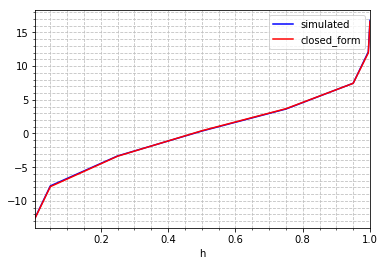

>>>

r2=0.999738, intercept=2.036766,slope=5.043670:
Linear regression of QQ plot: r2=0.999738, (intercept, slope)=(2.036766,5.043670):
Mystats::qq_plot:
Mystats::qv_plot:


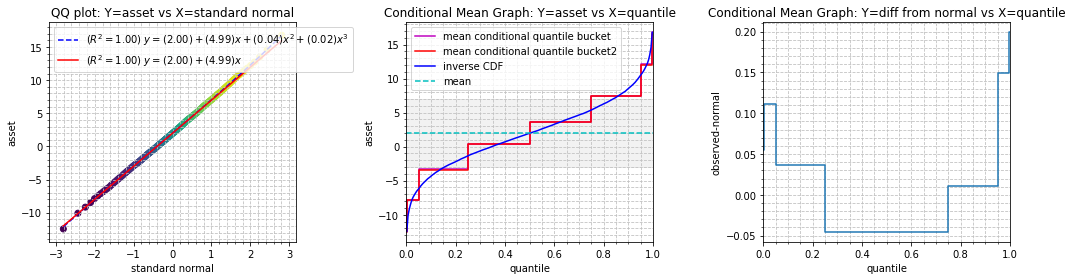

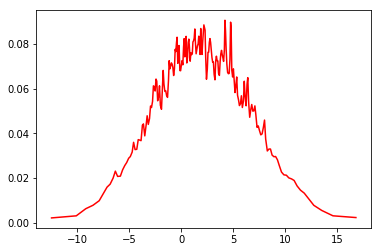

In [0]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import sklearn.metrics 

from itertools import product, zip_longest
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def show_grid(anc, which='both', axis='both', linestyle='--', color='silver'):
  anc.grid(True, which=which, axis=axis, linestyle=linestyle, color=color)
  anc.minorticks_on()
#end def
def show_grid2(anc, which_ax_line_col_list):
  for (which,axis,linestyle,color) in which_ax_line_col_list:
    show_grid(anc, which=which, axis=axis, linestyle=linestyle, color=color)
  #end for
#end def
def show_grid3(anc, axis):    
  which_ax_line_col_list = [
      ('major', axis, '-',  'black'),
      ('minor', axis, '--', 'silver')        
  ]
  show_grid2(anc, which_ax_line_col_list)
#end def

def show_label_title(anc_, xlabel_, ylabel_,title_):
  if isinstance(anc_, __builtins__.__class__):
    # case: plt
    anc_.xlabel(xlabel_); anc_.ylabel(ylabel_); anc_.title(title_)
  else:
    # case ax
    anc_.set(xlabel=xlabel_, ylabel=ylabel_); anc_.set_title(title_)
  #end if
#end def

def set_xlim(anc_, L_, H_):
  if isinstance(anc_, __builtins__.__class__):
    # case: plt
    anc_.xlim(L_,H_)
  else:
    # case ax
    anc_.set_xlim([L_,H_])
  #end if
#end def

def get_eq_label(Coeffs_):
  
  deg = Coeffs_.size -1
  
  ret_str = None
  if 1==deg: ret_str = '$y=(%.2f)+(%.2f)x$' % tuple(Coeffs_[::-1])
  if 2==deg: ret_str = '$y=(%.2f)+(%.2f)x+(%.2f)x^2$' % tuple(Coeffs_[::-1])
  if 3==deg: ret_str = '$y=(%.2f)+(%.2f)x+(%.2f)x^2+(%.2f)x^3$' % tuple(Coeffs_[::-1])
  
  return ret_str
#end def

def is_increasing(a_1d):
  a_1d = np.array(a_1d)
  return np.all(a_1d[:-1] < a_1d[1:])
#end def

def is_partition_of_unity(q_1d):
  if 0. != q_1d[0]:
    print('0. != q_1d[0]=', q_1d[0])
    assert 1==0
  #end if
  if 1. != q_1d[-1]:
    print('1. != q_1d[-1]=', q_1d[-1])
    assert 1==0
  #end if
  
  # is increasing
  assert True == is_increasing(q_1d)
  
  return True
#end def

def get_std_cmean_grid():
  q_1d_cmean     = np.array([0., .05, .25, .75, .95, 1.])
  q_labels_cmean = ['shortfall', 'mezz',  'most_likely',  'sub_windfall', 'windfall']
  q_labels_cmean_n = [ x+'_n' for x in q_labels_cmean]
  return (q_1d_cmean, q_labels_cmean, q_labels_cmean_n)
#end def

def calc_bucket_mean(arr_1d, bucket_1d):
  N_, B_ = arr_1d.size, bucket_1d.size
  assert 0==N_%B_
  Col_ = N_//B_
  arr_2d = np.reshape(np.sort(arr_1d), (-1,Col_))
  bucket_1d[:] = np.mean(arr_2d, axis=-1)
  
  diff_ = np.mean(bucket_1d) - np.mean(arr_1d)
  assert abs(diff_) <  .0000000000001 #$%^
  
#end def


def fill_x_buckets( x_bucket_1d_dens, x_bucket_1d_cmean):
  N_ = x_bucket_1d_dens.size
  x_bucket_1d_cmean[:] = np.linspace(0.,1.,N_+1); 
  x_bucket_1d_dens[:] = np.linspace(1./N_,1.,N_) - .5/N_
#end def

def calc_r2(y_true, y_predicted):
  sse = sum((y_true - y_predicted)**2)
  tse = (len(y_true) - 1) * np.var(y_true, ddof=1)
  r2_score = None
  if .00000000001 < abs(tse):
    r2_score = 1 - (sse / tse)
  #end if
  return r2_score, sse, tse
#end def


class Mystats:
  def __init__(self, N_size, N_buckets):
    
    assert 0==N_size%N_buckets
    
    self.N_size    = N_size
    self.N_buckets = N_buckets
    
    self.x_bucket_1d_dens  = np.empty(N_buckets)
    self.x_bucket_1d_cmean = np.empty(N_buckets+1)
    fill_x_buckets(self.x_bucket_1d_dens, self.x_bucket_1d_cmean)
    
    self.x_bucket_1d_ppf   = norm.ppf(self.x_bucket_1d_dens)
    
    self.y_bucket_1d       = np.empty(N_buckets)
    self.y_bucket_1d_cmean = np.zeros(N_buckets+1) # should not be empty

    (self.mean_, self.std_, self.SR_) = (None, None, None)
  #end def

  def set_data(self, y_arr_1d):
    (self.mean_, self.std_, self.SR_) = get_mean_std_sr( y_arr_1d )
    calc_bucket_mean(y_arr_1d, self.y_bucket_1d)
  #end def
  
  def get_mean_std_sr(self):
    return (self.mean_, self.std_, self.SR_)
  #end def
  
  # (r2_score, intercept, slope) = stat.calc_r2_inter_slope()
  def calc_r2_inter_slope(self):
    X_ = self.x_bucket_1d_ppf
    Y_ = self.y_bucket_1d
    Coeffs = np.polyfit(X_, Y_, deg=1)
    p1 = np.poly1d(Coeffs)
    Y_pred = p1(X_)
    r2_score = sklearn.metrics.r2_score(Y_, Y_pred)
    if 1==1:
      (r2,_,_) = calc_r2(Y_, Y_pred)
      if r2 is not None:
        assert abs(r2-r2_score) < .00000000001
      #end if
    #end def
    [slope, intercept] = Coeffs
    return (r2_score, intercept, slope)
  #end def
  
  def qq_plot(self, anc):
    deg = 3
    Coeffs_3 = np.polyfit(self.x_bucket_1d_ppf, self.y_bucket_1d, deg)
    p3 = np.poly1d(Coeffs_3)
    
    Coeffs_1 = Coeffs_3[-2::]
    p1 = np.poly1d(Coeffs_1)

    X_ = self.x_bucket_1d_ppf
    Y_3 = p3(self.x_bucket_1d_ppf)
    Y_1 = p1(self.x_bucket_1d_ppf)
    Y_  = self.y_bucket_1d
    
    r2_score_3 = sklearn.metrics.r2_score(Y_, Y_3)
    r2_score_1 = sklearn.metrics.r2_score(Y_, Y_1)
    
    label_3 = ('($R^2=%.2f$) '%r2_score_3) + get_eq_label(Coeffs_3)
    label_1 = ('($R^2=%.2f$) '%r2_score_1) + get_eq_label(Coeffs_1)
    
    print('Mystats::qq_plot:')
    anc.plot(X_, Y_3, 'b--', label=label_3)
    anc.plot(X_, Y_1, 'r-',  label=label_1)
    
    anc.scatter(X_, Y_, c=self.x_bucket_1d_dens )
    show_label_title(anc, 'standard normal', 'asset','QQ plot: Y=asset vs X=standard normal')
    show_grid(anc)
    
    #anc.legend(loc='best')
    anc.legend(loc='upper left')
    
    #plt.show()
  #end def
  def qq_plot2(self, y_arr_1d):
    self.set_data(y_arr_1d)
    self.qq_plot()
  #end def
  
  def qv_plot(self, anc, q_1d, mean_1d, mean_1d_n):
    print('Mystats::qv_plot:')
    mean_ = self.mean_
    std_  = self.std_
    
    x_step = q_1d
    y_step = np.insert(mean_1d, 0, mean_1d[0])
    anc.step(x_step, y_step,  color='m',label='mean conditional quantile bucket')
    
    y_step_n = np.insert(mean_1d_n, 0, mean_1d_n[0])
    anc.step(x_step, y_step_n, color='r', label='mean conditional quantile bucket2')
    
    anc.plot(self.x_bucket_1d_dens, self.y_bucket_1d,  color='b', label='inverse CDF')
        
    anc.axhline(y=mean_, label='mean', c='c',linestyle='--')
    anc.axhspan(mean_-std_, mean_+std_, alpha=0.1, color='grey') #alpha = 0.0 transparent through 1.0 opaque
    
    anc.legend(loc="upper left")
    
    show_grid(anc)
    set_xlim(anc, 0., 1.)
    show_label_title(anc, 'quantile', 'asset','Conditional Mean Graph: Y=asset vs X=quantile')
  #end def

  def calc_density(self):
    dx_dy_a =      np.gradient(self.x_bucket_1d_dens, self.y_bucket_1d)
    dx_dy_b = 1. / np.gradient(self.y_bucket_1d,      self.x_bucket_1d_dens)
    
    return (self.y_bucket_1d, dx_dy_b)
  #end def
  
  #--------------
  #
  #--------------
  def calc_quantile(self, q_in_1d, q_out_1d):
    f = interp1d(self.x_bucket_1d_dens, self.y_bucket_1d)
    q_out_1d[:] = f(q_in_1d)
  #end def
  def calc_quantile2(self, y_arr_1d, q_in_1d, q_out_1d):
    self.set_data(y_arr_1d)
    self.calc_quantile(q_in_1d, q_out_1d)
  #end def
  #--------------
  
  #--------------
  #
  #--------------
  def calc_normal_cmean(self, q_1d):
    assert is_partition_of_unity(q_1d)
    return calc_normal_cmean_1d(q_1d, self.mean_, self.std_)
  #end def
  
  def calc_cmean(self, q_1d):
    assert is_partition_of_unity(q_1d)
    
    self.y_bucket_1d_cmean[1:] = np.cumsum(self.y_bucket_1d)/self.N_buckets
    f = interp1d(self.x_bucket_1d_cmean, self.y_bucket_1d_cmean)
    
    wts_1d  = np.diff(q_1d,n=1)
    mean_1d = np.diff(f(q_1d),n=1) / wts_1d
    # quick sanity check
    assert abs(-self.mean_ + np.dot(wts_1d, mean_1d)) < .000000000001
    
    return (wts_1d, mean_1d)
    #-------------
  
  #end def
  def calc_cmean2(self, y_arr_1d, q_1d):
    self.set_data(y_arr_1d)
    return self.calc_cmean(q_1d)
  #end def
  def calc_cmean3(self, y_arr_1d, q_1d):
    (wts_1d, cmean_1d)     = self.calc_cmean2(y_arr_1d, q_1d)
    (wts_1d_n, cmean_1d_n) = self.calc_normal_cmean(q_1d)
    return (wts_1d, cmean_1d, cmean_1d_n)
  #end def
  def calc_cratio3(self, y_arr_1d, q_1d):
    (wts_1d, cmean_1d, cmean_1d_n) = self.calc_cmean3(y_arr_1d, q_1d)
    std_ = self.std_
    ret_val = (None, None, None)
    if std_ is not None:
      ret_val = (wts_1d, cmean_1d/std_, cmean_1d_n/std_)
    #end if
    return ret_val
  #end def
  #--------------
  
  def __del__(self):
    ;
  #end def
#end class

def my_qq_qv_plot(stat, q_1d, mean_1d, mean_1d_n):
  plt.figure(figsize=(15, 4))# figsize=(horz,vert)
  
  G = GridSpec(1, 3)
  ax_qq = plt.subplot(G[0, 0])
  ax_qv = plt.subplot(G[0, 1])
  ax_qd = plt.subplot(G[0, 2])
  
  stat.qq_plot(ax_qq)
  stat.qv_plot(ax_qv, q_1d, mean_1d, mean_1d_n)
  
  diff = mean_1d - mean_1d_n
  
  ax_qd.step(q_1d, np.insert(diff, 0, diff[0]))
  show_grid(ax_qd)
  set_xlim(ax_qd, 0., 1.)
  show_label_title(ax_qd, 'quantile', 'observed-normal','Conditional Mean Graph: Y=diff from normal vs X=quantile')

  
  plt.tight_layout()
  plt.show()    
#end def

def calc_bucket_mean_testme2():
  N_size, N_buckets = 10000, 10000
  N_size, N_buckets = 10000, 200
  
  mean_, std_ = 0., 1.
  mean_, std_ = 2., 5.
  y_arr_1d    = np.random.normal(mean_, std_, N_size)
  
  stat = Mystats(N_size, N_buckets)
  
  q_in_1d  = np.array([.05, .25, 0.5, .75, .95])
  q_out_1d_q = np.zeros_like(q_in_1d)
  stat.calc_quantile2(y_arr_1d, q_in_1d, q_out_1d_q)
  
  q_1d_a  = np.array([0., 1.])
  ([wts_s], [mean_s])= stat.calc_cmean2(y_arr_1d, q_1d_a)
  assert 1.==wts_s
  assert abs( - mean_s + np.mean(y_arr_1d)) < .0000000000001
  
    
  eps = .005
  q_1d = np.array([0., eps, .05, .25, .5, .75, .95, 1-eps, 1.])
  print('q_1d:', q_1d)
  assert is_increasing(q_1d)
  
  q_1d_d  = np.array([0., .05, .4, .6, .95, 1.])
  q_1_list = [q_1d]
  for q_1d in q_1_list:
    x_in_1d  = np.array([q_1d[0], q_1d[-1]])

    (wts_1d,   mean_1d)  = stat.calc_cmean2(y_arr_1d, q_1d)
    (wts_1d_n, mean_1d_n)= stat.calc_normal_cmean(q_1d)
    [r2,inter,slope]     = stat.calc_r2_inter_slope()
    
    df = pd.DataFrame()
    df['l']  = q_1d[0:-1]
    df['h']  = q_1d[1:]
    df['simulated'] = mean_1d
    df['closed_form'] = mean_1d_n
    df['sim-cf'] = mean_1d - mean_1d_n
    
    print('>>>mean_input, mean_sim=(', mean_,' , %.4f'%mean_s, ') df:\n', df)
    ax = plt.gca()
    df.plot(kind='line',x='h',y='simulated',   color='blue', ax=ax)
    df.plot(kind='line',x='h',y='closed_form', color='red',  ax=ax)
    show_grid(plt)
    plt.show()
    print('>>>\n')
        
    print('r2=%.6f, intercept=%.6f,slope=%.6f:'% (r2,inter,slope))
    print('Linear regression of QQ plot: r2=%.6f, (intercept, slope)=(%.6f,%.6f):'% (r2,inter,slope))
    my_qq_qv_plot(stat, q_1d, mean_1d, mean_1d_n)
    
  #end for
  
  
  X_dens, y_dens = stat.calc_density()
  fig, (ax_0) = plt.subplots(nrows=1, ncols=1)
  ax_0.plot(X_dens, y_dens, color='r')
  plt.show()

#end def
calc_bucket_mean_testme2()



Truncated ratios for <beta(1.000000.2.000000)>
(mean_,std_,Sharpe): (0.3298744891172888, 0.2370735584523323, 1.3914436146771538)
np.sum(df[diff_] * wts_1d):
|                         |   shortfall |       mezz |   most_likely |   sub_windfall |   windfall |
|-------------------------|-------------|------------|---------------|----------------|------------|
| probalilities           |  0.05       | 0.2        |      0.5      |        0.2     |   0.05     |
| beta(1.000000.2.000000) |  0.0540983  | 0.31986    |      1.24271  |        2.61645 |   3.60248  |
| normal counterpart      | -0.671269   | 0.318239   |      1.39144  |        2.46465 |   3.45416  |
| diff(given-normal)      |  0.725367   | 0.00162092 |     -0.148738 |        0.1518  |   0.148326 |
| cumsum(sumprod)         |  0.00270492 | 0.0666769  |      0.68803  |        1.21132 |   1.39144  |
| cumsum(sumprod)_n       | -0.0335635  | 0.0300843  |      0.725806 |        1.21874 |   1.39144  |


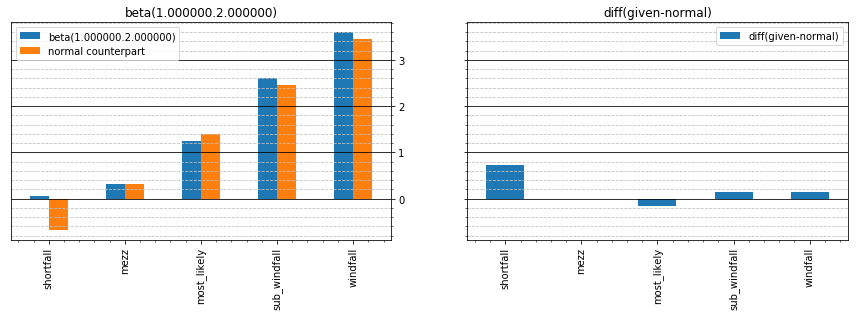


Truncated ratios for <normal(2.000000.5.000000)>
(mean_,std_,Sharpe): (1.9861649351949786, 4.986864884523358, 0.398279275895163)
np.sum(df[diff_] * wts_1d):
|                           |   shortfall |       mezz |   most_likely |   sub_windfall |   windfall |
|---------------------------|-------------|------------|---------------|----------------|------------|
| probalilities             |  0.05       |  0.2       |    0.5        |     0.2        |  0.05      |
| normal(2.000000.5.000000) | -1.65869    | -0.687285  |    0.404187   |     1.47339    |  2.43798   |
| normal counterpart        | -1.66443    | -0.674925  |    0.398279   |     1.47148    |  2.46099   |
| diff(given-normal)        |  0.00573898 | -0.0123599 |    0.00590782 |     0.00190898 | -0.0230135 |
| cumsum(sumprod)           | -0.0829347  | -0.220392  |   -0.0182982  |     0.27638    |  0.398279  |
| cumsum(sumprod)_n         | -0.0832217  | -0.218207  |   -0.0190671  |     0.27523    |  0.398279  |


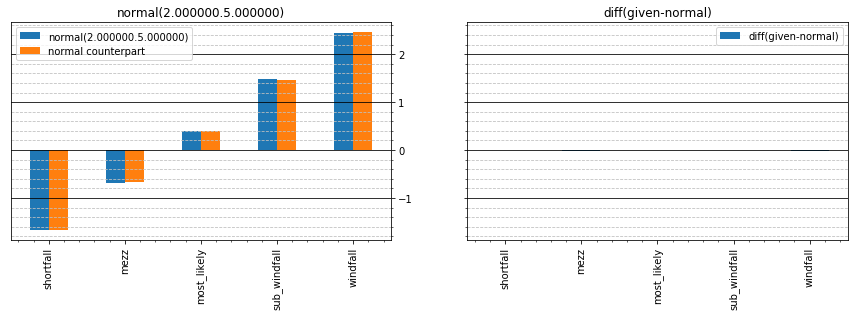

In [0]:
def calc_cmean3_testme():
  N_size, N_buckets = 10000, 10000
  N_size, N_buckets = 10000, 200
  
  alpha_, beta_ = 1, 2
  y_arr_1d_beta    = np.random.beta(alpha_, beta_, N_size)
  
  mean_, std_ = 2., 5.
  y_arr_1d_norm    = np.random.normal(mean_, std_, N_size)
  
  stat = Mystats(N_size, N_buckets)
  (q_in_1d, q_labels, q_labels_n) = get_std_cmean_grid()
  
  
  for (y_arr_1d, title_) in [
      (y_arr_1d_beta, 'beta(%f.%f)'%(alpha_,beta_)), 
      (y_arr_1d_norm, 'normal(%f.%f)'%(mean_,std_))
  ]:
    #----------------
    # calculate
    #----------------
    (wts_1d, cmean_1d,  cmean_1d_n)   = stat.calc_cmean3(y_arr_1d, q_in_1d)
    (wts_1d, cratio_1d, cratio_1d_n)  = stat.calc_cratio3(y_arr_1d, q_in_1d)
    (mean_,std_,sr_)  = stat.get_mean_std_sr()
    
    if 1==0:
      cval_1d, cval_1d_n = cmean_1d, cmean_1d_n
    else:
      cval_1d, cval_1d_n = cratio_1d, cratio_1d_n      
    #end if
    #----------------

    #----------------
    # display
    #----------------
    print('\n===============')
    print('Truncated ratios for <%s>' % title_)
    print('(mean_,std_,Sharpe):', (mean_,std_,sr_))
    print('===============')

    df = pd.DataFrame(index=q_labels)
    #df['q_labels'] = q_labels
    df['probalilities'] = wts_1d
    df[title_] = cval_1d
    df['normal counterpart'] = cval_1d_n
    
    diff_ = 'diff(given-normal)'
    df[diff_] = cval_1d - cval_1d_n
    df['cumsum(sumprod)']   = np.cumsum(wts_1d*cval_1d)
    df['cumsum(sumprod)_n'] = np.cumsum(wts_1d*cval_1d_n)
    
    assert abs(np.sum(df[diff_] * wts_1d)) < .00000000001

    print(tabulate(df.T, headers='keys', tablefmt='github'))
    
    f , (ax_0, ax_1) = plt.subplots(1,2,sharex=True, sharey=True)
    f.set_figheight(4); f.set_figwidth(15)
    
    #subplot 1
    df.plot.bar(y=[title_, 'normal counterpart'], ax=ax_0)
    ax_0.set_title(title_)
    
    #subplot 2
    df.plot.bar(y=[diff_], ax=ax_1)
    ax_1.set_title(diff_)
    
    ax_0.yaxis.tick_right()
    
    for ax_ in [ax_0, ax_1]:
      show_grid3(ax_, 'y')
    #end for
    
    plt.show()
    #----------------
  #end for
  
#end def
calc_cmean3_testme()


In [0]:
import numpy as np
import matplotlib.pyplot as plt

def draw_twin_graph(
  x_,   x_label,
  y1_, y1_label, y1_style, y1_color,
  y2_, y2_label, y2_style, y2_color,
  title_
):
  fig, ax1 = plt.subplots()

  ax1.set_xlabel(x_label)

  ax1.set_ylabel(y1_label, color=y1_color)
  ax1.plot(x_, y1_, y1_style,  color=y1_color)
  ax1.tick_params(axis='y', labelcolor=y1_color)

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  ax2.set_ylabel(y2_label, color=y2_color)  # we already handled the x-label with ax1
  
  #ax2.plot(x_, y2_, y2_style ,  color=y2_color)
  ax2.step(x_, y2_, y2_style ,  color=y2_color)
  
  ax2.tick_params(axis='y', labelcolor=y2_color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  
  plt.title(title_)
  plt.show()
#end def


In [0]:
import pandas as pd
import numpy  as np
from itertools import product, zip_longest


def print_pnl_subseq(asset, pos_ind, pnl_full_seq):
    
  df = pd.DataFrame()
  df['asset']=asset
  df['neg_asset_last']=-(df['asset'].shift(1))
  df['asset_mv']=df['asset'] + df['neg_asset_last']
  
  df['pos']=pos_ind
  df['pos']=['-' if 0==i else ('+1' if 1==i else '-1') for i in pos_ind]
  
  long_, short_ = 'long', 'short'
  df['posInd']=['-' if 0==i else (long_ if 1==i else short_) for i in pos_ind]
  df['posInd']=df['posInd'].shift(1)
  
  #df['pnl_full_seq']=pnl_full_seq
  df['pnl_full_seq']= \
    [
        (x if ((pos_==long_) or (pos_==short_)) else '-') 
        for (pos_,x) in zip_longest(df['posInd'],pnl_full_seq)
    ]

  print('\n**===================')
  print(df[['asset', 'pos', 'pnl_full_seq']])
  print('**===================')
#end def

def print_pnl_tuple_iter(tuple_iter, fmt='%.4f'):

  if 1==1:
    df2 = pd.DataFrame(data=tuple_iter, columns=['pos_', 'val_bgn', 'val_end', 'sum_', 'pnl_sub_seq'])
    
    df2['pnl_sub_seq'] = [ [fmt%x_ for x_ in seq_] for seq_ in df2['pnl_sub_seq']]
    
    print('\n@@===================')
    print(df2)
    print('@@===================')
  #end if

  if 1==1:  
    print('\n!!===================')
    for (pos_, val_bgn, val_end, sum_, pnl_sub_seq) in tuple_iter:
      print('pos=', pos_, ' (val_bgn, end)=(', val_bgn, ',', val_end, ') sum_=' , sum_, ' pnl_sub_seq:', pnl_sub_seq)
    #end for
    print('!!===================')
  #end if

#end def

def pos_path_to_pnl(asset_1d, pos_1d, pnl_1d):
  
  eps_ = 0.0000000000001
  if eps_ < abs(pos_1d[-1]):
    print('pos_1d[-1]=', pos_1d[-1])
    assert 1==0
  #end if
  pnl_1d[1:] = pos_1d[:-1] * np.diff(asset_1d, n=1)
  pnl_1d[0]=0.
  
#end def

def calc_pnl_subseq(asset, pos_ind, pnl_net, detailed_flag, debug_flag):
  

  assert 0==pos_ind[-1]
  #---------------------
  # construct full pnl sequence
  #---------------------
  asset_mv = np.diff(asset, n=1)
  pnl_net[1:]  = pos_ind[:-1] * asset_mv
  assert abs(pnl_net[0]) < .000000000001
  sum_full_seq  = np.sum(pnl_net)
  
  #---------------------
  #
  #---------------------
  pnl_net2 = np.zeros(pnl_net.size)
  pos_path_to_pnl(asset, pos_ind, pnl_net2)
  N_ = pos_ind.size
  for i in range(0,N_):
    diff_ = pnl_net2[i]-pnl_net[i]
    assert abs(diff_) < .00000000001
  #end for
  #---------------------
  
  
  #---------------------
  #
  #---------------------
  if 1==1:
    pnl_full_seq   = pos_ind[:-1] * asset_mv
    sum_full_seq2  = np.sum(pnl_full_seq)

    N_ = pos_ind.size; assert pnl_net.size == N_
    for i in range(1,N_):
      diff_ = pnl_net[i] - pnl_full_seq[i-1]
      assert abs(diff_) < .000000000001
    #end for
    diff_ = sum_full_seq - sum_full_seq2
    assert abs(diff_) < .000000000001
  #end if
  #---------------------
  
  tuple_iter = None
  if detailed_flag:
    #aaaaaaa
    pnl_full_seq  = np.concatenate(([np.nan], pnl_full_seq))
    #---------------------

    #---------------------
    # identify indices where positions are changing
    #---------------------
    (pos_changes_at,)= np.where(pos_ind[1:]!=pos_ind[:-1])
    end_pos = pos_ind[pos_changes_at]
    pos_changes_at += 2
    q_ = np.concatenate(([1], pos_changes_at[:-1]))
    #---------------------

    #---------------------
    # split pnl_full_seq into multiple same-position-pnl-subsequences
    # e.g
    #
    # pnl_full_seq = [-2.3,    1.2,   0, 0, 0,    0,  1.9,   -4,  0 ]
    # position_seq = [short, short,   _, _, _, long, long,  long, _ ]
    #
    # will generate the following two same-position-pnl-subsequences:
    #
    # o short-position subsequence: [-2.3,  1.2]
    # o long-position  subsequence: [   0,  1.9,   -4]
    #
    #---------------------
    tuple_iter = []
    sum_full_seq2 = 0.
    for (pos_, bgn_,end_) in (zip(end_pos,q_, pos_changes_at)):
      pnl_sub_seq = pnl_full_seq[bgn_:end_]
      val_bgn = pos_ * asset[bgn_-1]     
      val_end = pos_ * asset[end_-1]

      sum_ = np.sum(pnl_sub_seq)
      diff_ = (val_end-val_bgn) - sum_
      assert abs(diff_) < 0.000000000001

      if 0!=pos_:
        pnl_sub_seq_ = pnl_sub_seq
        #pnl_sub_seq_ = [ round(x,6) for x in pnl_sub_seq]
        
        tuple_ = (pos_, val_bgn, val_end, sum_, pnl_sub_seq_)
        sum_full_seq2 += sum_
        tuple_iter.append(tuple_)
      #end if
    #end or

    diff_ = sum_full_seq - sum_full_seq2
    assert abs(diff_) < 0.00000000001
    #---------------------

    #----------------------------
    #
    #----------------------------
    if True==debug_flag:
      print_pnl_subseq(asset, pos_ind, pnl_full_seq)
      print_pnl_tuple_iter(tuple_iter)
    #end if
    #----------------------------
    #aaaaaaa
  #end if
  
  return (sum_full_seq, tuple_iter)
#end def

def calc_pnl_subseq_with_max_horz(
    max_horz, asset, 
    pos_ind,pnl_net_1d, 
    detailed_flag, debug_flag
):
  
  N_ = asset.shape[0]; assert pos_ind.shape[0] == N_
  
  end_ = 1+max_horz
  if end_ < N_:
    asset_x       = asset[:end_]
    pos_ind_x     = pos_ind[:end_]
    pnl_net_1d_x  = pnl_net_1d[:end_]
    
    # force unwind
    pos_ind[end_-1:] = 0; assert 0==pos_ind_x[-1] #$$$
    
    return calc_pnl_subseq(asset_x, pos_ind_x, pnl_net_1d_x, detailed_flag, debug_flag)
  else:
    assert 0==pos_ind[-1]
    return calc_pnl_subseq(asset, pos_ind, pnl_net_1d, detailed_flag, debug_flag)    
  #end if
#end def


def calc_pnl_subseq_with_max_horz_test_me():

  detailed_flag = True # False True
  debug_flag = True # False True
  asset_p = np.array([-5, -9, -2, 3, 4, 7,  7,    1,   2,  2,  7, -6,  11])
  
  pos_ind = np.array([1,  1,  1,  1, 1, 1,   0,   0,  -1,  -1, -1, 0,  0])
  pnl_net = np.zeros(pos_ind.size)
  
  
  sum_full_seq,tuple_iter = calc_pnl_subseq_with_max_horz(100, asset_p, pos_ind, pnl_net, detailed_flag, debug_flag)
  sum_full_seq,tuple_iter = calc_pnl_subseq_with_max_horz(  6, asset_p, pos_ind, pnl_net, detailed_flag, debug_flag)

  
  pos_ind = np.array([0,  0,  -1,  1, 1, 1,   -1,   0,  -1,  -1, -1, 0,  0])
  sum_full_seq,tuple_iter = calc_pnl_subseq_with_max_horz(500, asset_p, pos_ind, pnl_net, detailed_flag, debug_flag)
  
#end def

calc_pnl_subseq_with_max_horz_test_me()


**===================
    asset pos pnl_full_seq
0      -5  +1            -
1      -9  +1           -4
2      -2  +1            7
3       3  +1            5
4       4  +1            1
5       7  +1            3
6       7   -            0
7       1   -            -
8       2  -1            -
9       2  -1            0
10      7  -1           -5
11     -6   -           13
12     11   -            -
**===================

@@===================
   pos_  val_bgn  val_end  sum_  \
0     1       -5        7  12.0   
1    -1       -2        6   8.0   

                                         pnl_sub_seq  
0  [-4.0000, 7.0000, 5.0000, 1.0000, 3.0000, 0.0000]  
1                         [0.0000, -5.0000, 13.0000]  
@@===================

!!===================
pos= 1  (val_bgn, end)=( -5 , 7 ) sum_= 12.0  pnl_sub_seq: [-4.  7.  5.  1.  3.  0.]
pos= -1  (val_bgn, end)=( -2 , 6 ) sum_= 8.0  pnl_sub_seq: [ 0. -5. 13.]
!!===================

**===================
   asset pos pnl_full_seq
0     -5 


#Notes on Ornstein–Uhlenbeck process

In order to keep this as much self-contained as possible,  we shall state and sketch the derivation of all the relevant formula used. Let us start with the standard O-U process:

$$dx=\lambda(L-x)dt+\sigma dW_t,$$
symbols having their usual meanings.


Using change of variable
$$u \equiv \frac{x-L}{\sigma}$$
and rearranging terms, we have

$$
du + \lambda u dt = dW_t
$$

Multipying both sides by  $e^{\lambda t}$ and recognizing that
$e^{\lambda t}(du + \lambda u dt )= d(e^{\lambda t}u)$, we have

$$
d(e^{\lambda t}u) = e^{\lambda t}dW_t
$$

Integrating both sides from $0$ to $t$, we have
$$
e^{\lambda t}u(t)  - u(0) = \int_{0}^{t}e^{\lambda s}dW_{s}
$$

Hence,
$$
u(t) = e^{-\lambda t}u(0) + z(t) 
\text{ where } z(t) \equiv  e^{-\lambda t}\int_{0}^{t}e^{\lambda s}dW_s
$$

We note that $z(t)$ is Gaussian with 
$$E[z(t)]=0$$
$$E[{z(t)}^2]
\\
=e^{-2\lambda t}E\Big[{\int_{0}^{t}f(s)dW_s}\Big]^2 \text{ where } f(s) \equiv e^{\lambda s}
\\
=e^{-2\lambda t}\Big[{\int_{0}^{t}[f(s)]^2 ds}\Big]
\text { by Ito isometry }
\\
=\frac{1}{2\lambda}\Big[ 1 - e^{-2\lambda t} \Big]
\\
=tA(2\lambda t)  \text{ where } A(s) \equiv (1-e^{-s})/s 
$$


Putting everything back in terms of $x$, we have

$$
\frac{x(t)-L}{\sigma} =  e^{-\lambda t}\frac{x(0)-L}{\sigma} + z(t)
$$

Rearranging terms, we have

$$\boxed{
x(t) = (1-e^{-\lambda t})L +  e^{-\lambda t}x(0) +\sigma B(t, \lambda)   \varepsilon \\
\text{ where } B(t, \lambda) 
\equiv \sqrt{\frac{1}{2\lambda}\Big[ 1 - e^{-2\lambda t} \Big]}
\equiv \sqrt{tA(2\lambda t) } 
\text{ and } \varepsilon \sim   ~ n(0,1)
}$$



##Implementation Note on the function $A$
We note that as the definition stands,  $A(s)$ is undefined $(0/0)$ at $s=0$ with 
$$
\displaystyle{\lim_{s \to 0}}A(s)
=\displaystyle{\lim_{s \to 0}}\frac{e^{-s}}{1}
=1$$ 


We also note that for small $s$, $A(s)$ can be Taylor expanded as follows:
$$
A(s) \approx    1- \frac{s}{2!}  + \frac{s^2}{3!} -\frac{s^3}{4!} \ldots
$$ 

Hence, we arrive at the following implementation-friendly definition of $A(s)$:
$$\boxed{
A(s) \equiv
\left\{
	\begin{array}{ll}
		1- \frac{s}{2}  + \frac{s^2}{6} -\frac{s^3}{24}  & \mbox{if }|s| < \epsilon \\
		(1-e^{-s})/s  & \mbox{otherwise }
	\end{array}
\right.
}$$


##Half-life of a mean-reverting process:
Let $X(t) \equiv E[x(t)].$ Then we $X(t)= (1-e^{-\lambda t})L +  e^{-\lambda t}X(0) +\sigma \sqrt{tA(2\lambda t) }   0$. Rearraging terms, we have 
$$
\frac{X(t)-L}{X(0)-L}=e^{-\lambda t}
$$
Hence, expected distance from the mean-reversion level comes down exponentially with time, the rate being given by $\lambda$. Akin to raioactive decay, half-life $H$ of a mean-reversion process is defined the time it takes for the expected distance from the long-term level to halve:
$$
\frac{1}{2} \equiv \frac{X(H)-L}{X(0)-L}=e^{-\lambda H}
$$

Hence,
$$\boxed{
e^{-\lambda}= {[2]} ^{-\frac{1}{H}}  \text{  or equivalently, } H = \frac{\ln(2)}{\lambda}
}$$

##Notes on discretization of OU process:
$$
x(t+\Delta t) = (1-e^{-\lambda \Delta t})L +  e^{-\lambda \Delta t}x(t) +\sigma \sqrt{\Delta tA(2\lambda \Delta t) }    \varepsilon 
$$

Choosing unit of time to be the same as the discretization time step, i.e. setting $\Delta t=1$

$$
x(t+1) = (1-\phi)L +  \phi x(t) +\eta \varepsilon 
\\\text{ where }  \phi \equiv e^{-\lambda} = {[2]} ^{-\frac{1}{H}} \text{ and } 
\eta \equiv \sigma \sqrt{A(2\lambda) }
$$

Choosing $\eta$ to be the unit in which both $x(t)$ and $L$ are both expressed, we have the following:
$$\boxed{
x(t+1) = (1-\phi)L +  \phi x(t) + \varepsilon 
\\\text{ where }  \phi \equiv {[2]} ^{-\frac{1}{H}}
}$$





In [0]:
import numpy as np

def A_( s_):
  ret_ = None
  if abs(s_) < 0.0000001 :
    ret_ = 1.
    tmp_ =  (s_/2.) ; ret_ -= tmp_
    tmp_ *= (s_/3.) ; ret_ += tmp_
    tmp_ *= (s_/4.) ; ret_ -= tmp_
  else:
    ret_ = 1. - np.exp(-s_)
    ret_ /= s_
  #end if
  return ret_
#end def

def B_(t_, lambda_):
  ret_ = np.sqrt(t_ * A_(2*lambda_*t_))  
  return ret_
#end def

def B_1d(t_steps_1d, half_life):
  lambda_ = np.log(2)/half_life
  PQ_ = np.vectorize(B_)(t_steps_1d,lambda_)
  
  std_aymptote = 1. / np.sqrt(2. * lambda_) 
  norm_fact = B_(1,lambda_)
  
  PQ_          /= norm_fact
  std_aymptote /= norm_fact
  
  return (PQ_, std_aymptote)
#end def

class OU_process:
  def __init__(self, triple_):
    self.triple_ = triple_
    print('OU_process:: self.triple_=',  self.triple_)  
    self.x_ = None
  #end def

  def set_init(self, x_):
    self.x_ = x_
  #end def
  
  def next(self, std_normal):
    if self.x_ is None: return None
    sumProd_ = np.dot(self.triple_,   [1., self.x_, std_normal])
    self.x_ = sumProd_
    return self.x_
  #end def
  
  def get_triple_B(self):
    [a_, b_, std_normal_mult] = self.triple_
    assert .000000001 < abs(1.-b_)
    level         = a_/(1.-b_)
    half_life = - np.log(2) / np.log(b_)
    return np.array([level, half_life, std_normal_mult])
  #end def
  
  
  def __del__(self):
    ;
  #end def
#end class

def calc_OU_triple_B(level, half_life, std_normal_mult):
  
  b_ = 2 ** (-1./half_life)
  return np.array([level*(1-b_), b_, std_normal_mult])
  
#end def

def get_OU_process_from_triple_B(level_, half_life_, std_normal_mult_):
  OU_triple_B = calc_OU_triple_B(level_, half_life_, std_normal_mult_)
  stoch_proc = OU_process(OU_triple_B)
  return stoch_proc
#end def



#OU process simulation: sanity check list:

For every time step, we calculate ($R^2$, intercept, slope) triple for the linear regression of QQ plot at that time step. These yield three time series: $R^2$, intercept, slope.

* **$R^2$ time series** should be constant at $1$ confirming that the terminal distributions are Gaussians at all time steps.
* **intercept time series** should have a horizotal asymptote at 'level'
* **slope time series** should have a horizotal asymptote at theoretical value
* **mean time series** should pass through the intersection of the verical line at half-life and the horizontal line at half-line (i.e. halfway between the level and the initial value)


OU_process:: self.triple_= [0.  0.5 1. ]
***  S0= -10  (N_sim, N_periods)= (10000, 126)  seed= 23
generate_path_2d:[1/10000]
generate_path_2d:[5001/10000]
Finished generating (10000, 126) paths


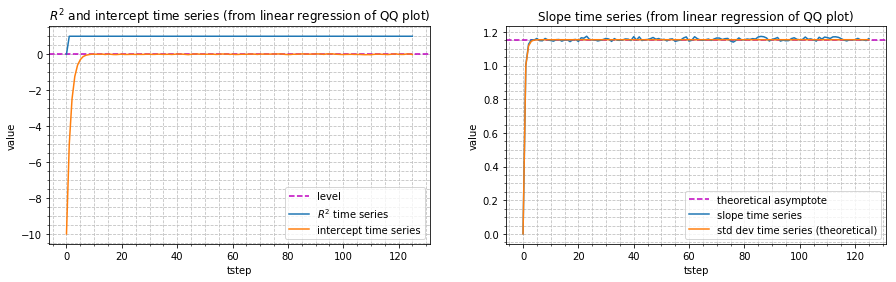

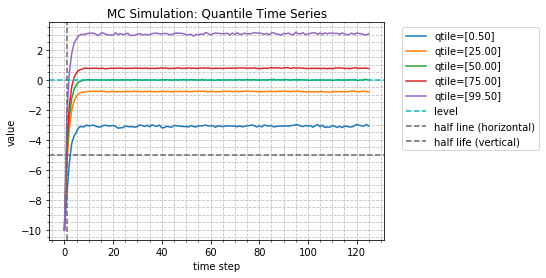

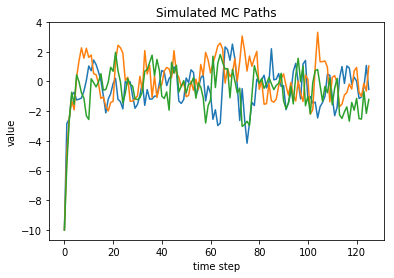

OU_process:: self.triple_= [0.         0.87055056 1.        ]
***  S0= -10  (N_sim, N_periods)= (10000, 126)  seed= 23
generate_path_2d:[1/10000]
generate_path_2d:[5001/10000]
Finished generating (10000, 126) paths


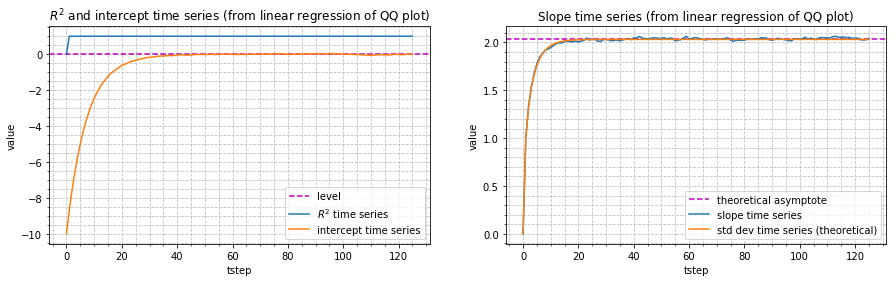

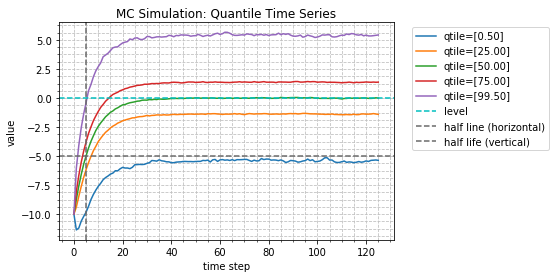

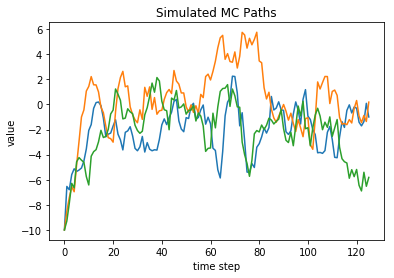

OU_process:: self.triple_= [0.         0.97265495 1.        ]
***  S0= -10  (N_sim, N_periods)= (10000, 126)  seed= 23
generate_path_2d:[1/10000]
generate_path_2d:[5001/10000]
Finished generating (10000, 126) paths


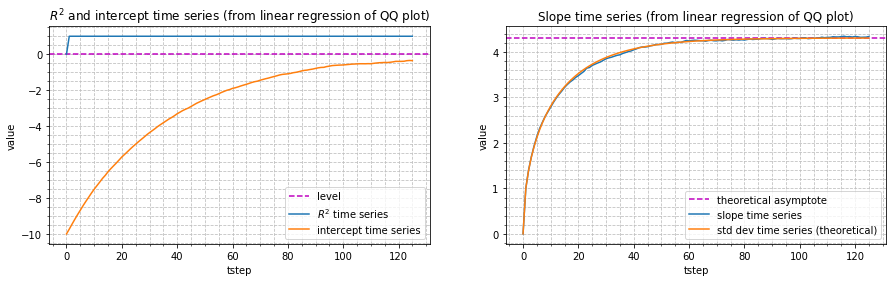

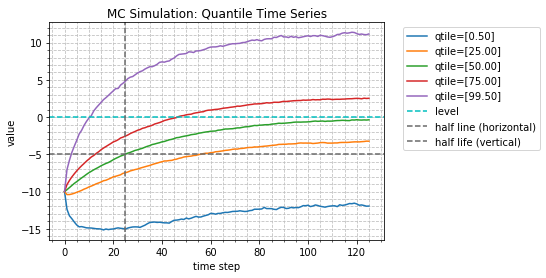

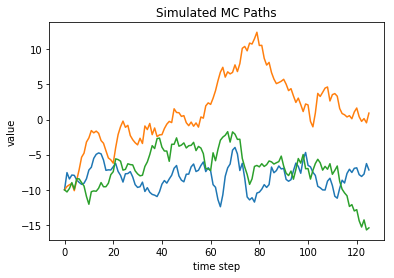

OU_process:: self.triple_= [0.        0.9862327 1.       ]
***  S0= -10  (N_sim, N_periods)= (10000, 126)  seed= 23
generate_path_2d:[1/10000]
generate_path_2d:[5001/10000]
Finished generating (10000, 126) paths


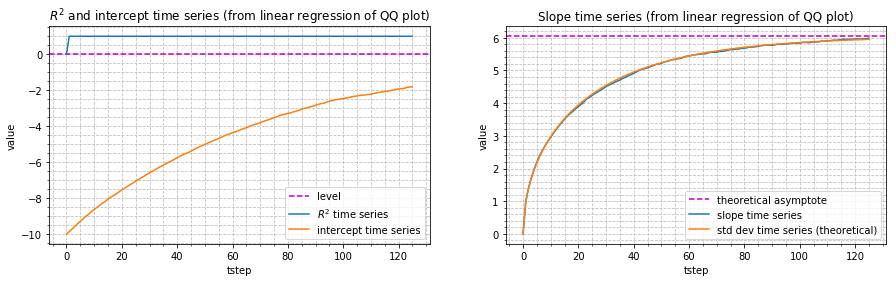

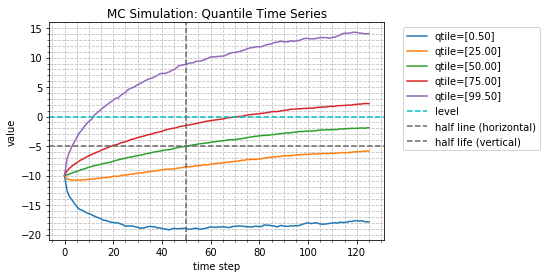

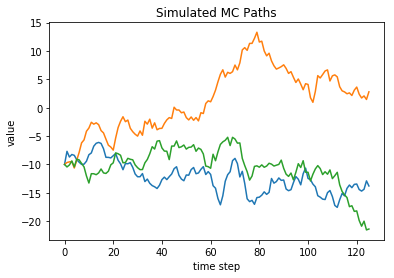

OU_process:: self.triple_= [0.        0.9930925 1.       ]
***  S0= -10  (N_sim, N_periods)= (10000, 126)  seed= 23
generate_path_2d:[1/10000]
generate_path_2d:[5001/10000]
Finished generating (10000, 126) paths


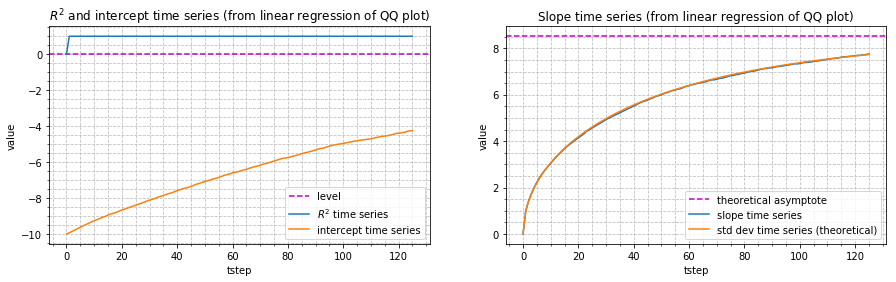

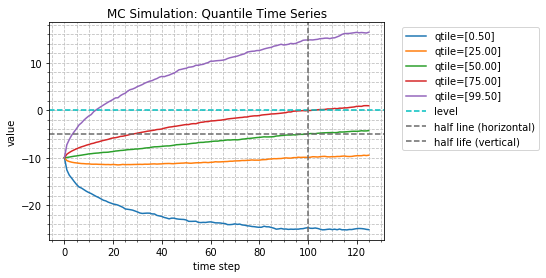

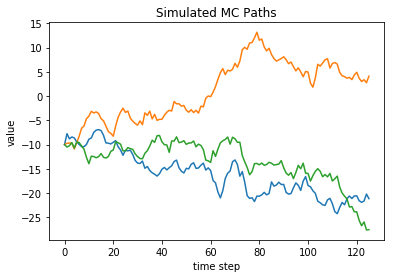

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

import random
from random import gauss
#------------------------------
#
#------------------------------
def generate_path_1d(stoch_proc, S0, path_1d):
  N_periods = path_1d.shape[0]
  
  stoch_proc.set_init(S0)
  path_1d[0] = S0
  for t in range(1,N_periods):
    path_1d[t] = stoch_proc.next( gauss(0,1) )
  #end for
#end def

def calc_term_distr(
    path_2d, 
    q_in_1d, t_steps_1d, q_out_2d,
    r2_score_1d, intercept_1d, slope_1d,
    N_buckets
):
  
  (N_sim, N_periods) = path_2d.shape
  stat = Mystats(N_sim, N_buckets)
  assert q_out_2d.shape == ( q_in_1d.size, t_steps_1d.size )
  for (i, t_) in enumerate(t_steps_1d):
    stat.set_data(path_2d[:,t_])
    stat.calc_quantile(q_in_1d, q_out_2d[:,i])
    (r2_score_1d[i], intercept_1d[i], slope_1d[i]) = stat.calc_r2_inter_slope()
  #end for
#end def

def get_q_labels(q_in_1d):
  #format_ = '%.2f qtile'
  format_ = 'qtile=[%.2f]'
  return [format_%(u_*100) for u_ in q_in_1d]
#end def

def get_std_qtiles():
  q_in_1d  = np.array([.005,.05, .25, 0.5, .75, .95, .995])
  q_in_1d  = np.array([.005,.25, 0.5, .75, .995])
  q_labels = get_q_labels(q_in_1d)
  return (q_in_1d, q_labels)  
#end def

def plot_quantile_time_series(
    path_2d, 
    level, half_life, 
    detail_plot_flag, 
    N_buckets = 200
):
  
  (q_in_1d, q_label_iter) = get_std_qtiles()
  
  (N_sim, N_periods) = path_2d.shape
  t_steps_1d  = np.array(range(N_periods))
  q_out_2d    = np.zeros((q_in_1d.size, t_steps_1d.size))
  
  assert t_steps_1d.size == N_periods
  r2_score_1d   = np.empty(N_periods)
  intercept_1d  = np.empty(N_periods)
  slope_1d      = np.empty(N_periods)
  calc_term_distr(
      path_2d, 
      q_in_1d, t_steps_1d, q_out_2d, 
      r2_score_1d, intercept_1d, slope_1d, 
      N_buckets
  )
  PQ_,std_aymptote = B_1d(t_steps_1d,half_life)
  
  
  if detail_plot_flag:
    #----------------
    #
    #----------------
    plt.figure(figsize=(15,4))
    G = GridSpec(1,2)
    ax_0 = plt.subplot(G[0,0])
    ax_1 = plt.subplot(G[0,1])
    #----------------
    
    #----------------
    #
    #----------------
    ax_0.axhline(level, label='level', c='m', linestyle='--')
    ax_0.plot( t_steps_1d, r2_score_1d,  label='$R^2$ time series')
    ax_0.plot( t_steps_1d, intercept_1d, label='intercept time series')
    show_label_title(ax_0,'tstep', 'value', '$R^2$ and intercept time series (from linear regression of QQ plot)')
    show_grid(ax_0)
    ax_0.legend(loc='lower right')
    #----------------

    #----------------
    #
    #----------------
    ax_1.axhline(std_aymptote, label='theoretical asymptote', c='m', linestyle='--')
    ax_1.plot( t_steps_1d, slope_1d,     label='slope time series')
    ax_1.plot( t_steps_1d, PQ_,     label='std dev time series (theoretical)')
    show_label_title(ax_1,'tstep', 'value', 'Slope time series (from linear regression of QQ plot)')
    show_grid(ax_1)
    ax_1.legend(loc='lower right')
    #----------------
    
    plt.show()
  #end if
  
  for i,label in enumerate(q_label_iter):
    plt.plot( t_steps_1d, q_out_2d[i,:], label=label)
  #end for
  plt.legend(loc='upper left')
  
#end def

def generate_path_2d(stoch_proc, S0, path_2d, seed):
  print('***',  ' S0=', S0, ' (N_sim, N_periods)=', path_2d.shape, ' seed=', seed)

  random.seed(seed)
  np.random.seed(seed)

  N_sim = path_2d.shape[0]
  for s_ in range(N_sim):
    if 0==s_%5000: print('generate_path_2d:[%d/%d]' % (1+s_,N_sim))
    generate_path_1d(stoch_proc, S0, path_2d[s_,:])
  #end for
  
  print('Finished generating', path_2d.shape, 'paths')
#end def
#------------------------------

def generate_path_2d_OU(
    S0, level, half_life, std_normal_mult, 
    path_2d, seed, 
    plot_cd
):
  
  #-----------------
  #
  #-----------------
  stoch_proc = get_OU_process_from_triple_B(level, half_life, std_normal_mult)
  generate_path_2d(stoch_proc, S0, path_2d, seed)
  #-----------------
  
  if 0!=plot_cd:
    
    #--------------
    #
    #--------------
    plot_quantile_time_series(path_2d, level, half_life, (2<=plot_cd))
    #--------------
    
    #--------------
    # horizontal lines at 'level' and 'half line'
    #--------------
    plt.axhline(y=level,         label='level',     c='c', linestyle='--')
    plt.axhline(y=.5*(S0+level), label='half line (horizontal)', c='dimgrey', linestyle='--')
    #--------------
    
    #--------------
    # vertical line at 'half life'
    #--------------
    (N_sim, N_periods) = path_2d.shape
    if half_life<=N_periods: 
      plt.axvline(x=half_life, label='half life (vertical)', c='dimgrey', linestyle='--')
    #end if
    #--------------
    
    #--------------
    #
    #--------------
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    show_label_title(plt,'time step', 'value','MC Simulation: Quantile Time Series')
    show_grid(plt)
    plt.show()
    #--------------
    
  #end if
#end def

def generate_path_2d_testme():
  
  
  (N_sim, N_periods) = (10**4, 126)
  path_2d = np.zeros((N_sim, N_periods))
  seed    = 23
  
  ou_tuple_iter = []
  
  S0_ = -10
  
  (S0, level, half_life, std_normal_mult) = (S0_, 0.,  1, 1.)
  ou_tuple_iter.append((S0, level, half_life, std_normal_mult))
  
  (S0, level, half_life, std_normal_mult) = (S0_, 0.,  5, 1.)
  ou_tuple_iter.append((S0, level, half_life, std_normal_mult))
  
  (S0, level, half_life, std_normal_mult) = (S0_, 0., 25, 1.)
  ou_tuple_iter.append((S0, level, half_life, std_normal_mult))
  
  (S0, level, half_life, std_normal_mult) = (S0_, 0., 50, 1.)
  ou_tuple_iter.append((S0, level, half_life, std_normal_mult))
  
  (S0, level, half_life, std_normal_mult) = (S0_, 0., 100, 1.)
  ou_tuple_iter.append((S0, level, half_life, std_normal_mult))
  
  for ou_tuple in ou_tuple_iter:
    generate_path_2d_OU(*ou_tuple, path_2d, seed, 2)
    
    if 1==1:
      plt.plot(path_2d[range(3),:].T)
      plt.xlabel('time step')
      plt.ylabel('value')
      plt.title('Simulated MC Paths')
      plt.show()
    #end def
  #end for
  
#end def

generate_path_2d_testme()

In [0]:

def barrier_breached( last_, cur_, barr_1d, ind_1d):
  
  assert len(barr_1d) == len(ind_1d)
  
  if last_ < cur_:
    #------------
    # upswing 
    #------------
    for i,b_ in enumerate(barr_1d):
      ind_ = 0
      if (last_ <= b_) and (b_<cur_):
        # breach from below
        ind_ = -1
      #end if
      ind_1d[i] = ind_
    #end for
    #------------
  else:
    #------------
    # down swing 
    #------------
    for i,b_ in enumerate(barr_1d):
      ind_ = 0
      if (cur_ <= b_) and (b_<last_):
        # breach from above
        ind_ = 1
      #end if
      ind_1d[i] = ind_
    #end for
    #------------
  #end if

#end def

def barrier_breached_why_slow( last_, cur_, barr_1d, ind_1d):
  #assert (barr_1d.size) == (ind_1d.size)

  if (last_ < cur_):
    ind_1d[:] = np.where( (last_<=barr_1d) & (barr_1d<cur_),  -1, 0)
  else:
    ind_1d[:] = np.where( (cur_ <=barr_1d) & (barr_1d<last_), +1, 0)
  #end if
#end def

def barrier_breached_testme():
  barr_1d = np.array([1., 2., 3., 4., 5.])
  ind_1d = np.empty(barr_1d.size); ind_1d.fill(-9999)
  
  last_ = 2.5; cur_ = 3.5
  
  N_ = 10**4
  ts = dt.now()
  for _ in range(N_): barrier_breached( last_, cur_, barr_1d, ind_1d)
  (ts, str_) = get_time_diff( ts ); print(str_)
  
  if 1==1:
    ind_1d_old = np.empty((barr_1d).size); ind_1d_old.fill(-9999)
    
    ts = dt.now()
    for _ in range(N_): barrier_breached_why_slow( last_, cur_, barr_1d, ind_1d_old)
    (ts, str_) = get_time_diff( ts ); print(str_)
    
    assert True==np.array_equal(ind_1d, ind_1d_old)
  #end if
  
  print(ind_1d)
  print(ind_1d_old)
#end def
barrier_breached_testme()

elapsed time = 0:00:00.032285 (hh:mm:ss.ms)
elapsed time = 0:00:00.048430 (hh:mm:ss.ms)
[ 0.  0. -1.  0.  0.]
[ 0.  0. -1.  0.  0.]


In [0]:

def next_pos__LS_4_barr(pos_ind_, ind_1d):
  
  opn_long_ind = ind_1d[0]
  cls_long_ind = ind_1d[1]
  cls_shrt_ind = ind_1d[2]
  opn_shrt_ind = ind_1d[3]
  
  #----------------------
  # (-1==ind) = barrier breach from below, upswing
  # (+1==ind) = barrier breach from above, down swing
  #----------------------
  new_ind_ = pos_ind_

  if   0==pos_ind_:
    # currently holding no position
    # need to check: opn_shrt_ind breached from below = -1?
    # need to check: opn_long_ind breached from above = +1?
    if -1==opn_shrt_ind: new_ind_= -1 # open short
    if +1==opn_long_ind: new_ind_= +1 # open long


  elif -1==pos_ind_:
    # currently holding short position
    # need to check: cls_shrt_ind breached from above = +1?
    # need to check: opn_long_ind breached from above = +1?
    if +1==cls_shrt_ind: new_ind_ =  0 # close short
    if +1==opn_long_ind: new_ind_ = +1 # open long


  elif  1==pos_ind_:
    # currently holding long position
    # need to check: cls_long_ind breached from below = -1?
    # need to check: opn_shrt_ind breached from below = -1?
    if -1==cls_long_ind: new_ind_ =  0 # close long
    if -1==opn_shrt_ind: new_ind_ = -1 # open short

  else:
    print('??????pos_ind_:', pos_ind_)
    assert 1==0
  #end if
  
  #---------------
  #
  #---------------
  return new_ind_
  #---------------

#end def

def apply_strat_LS_4_barr(path_1d, barr_1d, pos_ind_1d, opn_barr_breached):
  
  assert isinstance(opn_barr_breached, bool)
  #-----------------
  #
  #-----------------
  N_per = len(path_1d)
  assert len(pos_ind_1d) == N_per
  pos_ind_1d.fill(-9999)

  #barr_1d = [opn_long, cls_long, cls_shrt, opn_shrt]
  opn_long = barr_1d[0]
  cls_long = barr_1d[1]
  cls_shrt = barr_1d[2]
  opn_shrt = barr_1d[3]
  
  #ind_1d  = np.empty(len(barr_1d))
  ind_1d  = np.empty(barr_1d.size)
  #-----------------
  
  #-----------------
  # initial position
  #-----------------
  last_    = path_1d[0]
  
  assert cls_long < cls_shrt
  pos_ind_ = 0

  #----------------------
  #
  #----------------------
  if last_ < cls_long:
    if last_ < opn_long:
      pos_ind_ = +1 # open long, ignore 'opn_barr_breached' flag
    else:
      # opn_long <= last_ < cls_long
      # ambiguous case. Hence depend on user provided flag 'opn_barr_breached'
      pos_ind_ = +1 if True==opn_barr_breached else 0
    #end if
  #end if
  #----------------------

  #----------------------
  #
  #----------------------
  if cls_shrt < last_:
    if opn_shrt < last_:
      pos_ind_ = -1 # open short, ignore 'opn_barr_breached' flag
    else:
      # cls_shrt < last_ <= opn_shrt
      # ambiguous case. Hence depend on user provided flag 'opn_barr_breached'
      pos_ind_ = -1 if True==opn_barr_breached else 0
    #end if
  #end if
  #----------------------
    
  
  if 1==0:
    print('---cls_shrt=', cls_shrt, '---cls_long=', cls_long)
    print('---last_=', last_, '---pos_ind_=', pos_ind_)
  #end if
  
  #-----------------
  #
  #-----------------
  pos_ind_1d[0] = pos_ind_
  for i in range(1, N_per):
    
    cur_  = path_1d[i]
    barrier_breached( last_, cur_, barr_1d, ind_1d)
    
    #[opn_long_ind, cls_long_ind, cls_shrt_ind, opn_shrt_ind] = list(ind_1d)
    #new_ind_      = next_pos__LS_4_barr(pos_ind_, opn_long_ind, cls_long_ind, cls_shrt_ind, opn_shrt_ind)
    new_ind_      = next_pos__LS_4_barr(pos_ind_, ind_1d)
    
    
    pos_ind_1d[i] = new_ind_
    
    # update
    pos_ind_      = new_ind_
    last_         = cur_
  #end for
  #-----------------
  
#end def

class Strategy_LS_4_barr:
  def __init__(self, opn_long, cls_long, cls_shrt, opn_shrt):
    
    assert opn_long <= cls_long
    assert cls_long <  cls_shrt
    assert cls_shrt <= opn_shrt
    
    self.opn_long_ = opn_long
    self.cls_long_ = cls_long
    self.cls_shrt_ = cls_shrt
    self.opn_shrt_ = opn_shrt
    
    self.barr_1d_  = np.array([ opn_long,  cls_long, cls_shrt, opn_shrt])
  #end def

  def apply(self, path_1d, pos_ind_1d, opn_barr_breached):    
    apply_strat_LS_4_barr(
        path_1d, self.barr_1d_, 
        pos_ind_1d, opn_barr_breached
    )
  #end def
  
  def get_barriers(self):
    return self.barr_1d_
  #end def
  
  def get_barrier_desc(self):
    return ['open_long', 'close_long', 'close_short', 'open_short']
  #end def
  
  def get_barrier_desc2(self, fmt='=[%.2f]'):
    return [
        'open_long'   + fmt %self.opn_long_, 
        'close_long'  + fmt %self.cls_long_, 
        'close_short' + fmt %self.cls_shrt_, 
        'open_short'  + fmt %self.opn_shrt_
    ]
  #end def
  
  def __del__(self):
    ;
  #end def
#end class


In [0]:
def explore_this_path_this_strat_2(
    path_1d, 
    pos_ind_1d,pnl_net_1d,
    max_hold_per,
    detailed_flag,
    debug_flag
):
  (sum_full_seq, tuple_iter) = calc_pnl_subseq_with_max_horz(
          max_hold_per, 
          path_1d, 
          pos_ind_1d, pnl_net_1d,
          detailed_flag, 
          debug_flag
  )
  if True==debug_flag:  
    print('\n!!=================')
    
    if tuple_iter is not None:
      for (pos_, val_bgn, val_end, sum_, pnl_sub_seq) in tuple_iter:
        print('pos=', pos_, ' (val_bgn, end)=(', val_bgn, ',', val_end, ') sum_=' , sum_, ' pnl_sub_seq:', pnl_sub_seq)
      #end for
    #end if
    
    print('sum_full_seq=', sum_full_seq)
    print('!!=================')
  #end if
  return (sum_full_seq)
#end def


def init_pos_pnl(pos_ind, pnl_net):
  pos_ind.fill(-999)
  pnl_net.fill(0.)  
#end def


def path_single_strat_to_pnl(
    single_strat_,
    path_1d, 
    pos_ind_1d, opn_barr_breached,pnl_net_1d,
    max_hold_per,
    detailed_flag,
    debug_flag        
):
  #-------------------
  #
  #-------------------
  init_pos_pnl(pos_ind_1d,pnl_net_1d)
  
  single_strat_.apply( path_1d, pos_ind_1d, opn_barr_breached )

  if debug_flag:
    barriers = single_strat_.get_barriers()
    barrier_desc = single_strat_.get_barrier_desc2()

    plot_intermedite_steps(path_1d, barriers, barrier_desc, pos_ind_1d)
  #end if
  #-------------------

  # generate pnl for this path and this strategy
  if 1==0:
    (pnl_net_this_sim, N_hold_per, val_bgn, val_end, dd_max, mean_this_sim, std_this_sim, SR_this_sim) \
      = explore_this_path_this_strat(
          path_1d, 
          pos_ind_1d,
          max_hold_per,
          debug_flag
      )
  else:
    (pnl_net_this_sim) \
      = explore_this_path_this_strat_2(
          path_1d, 
          pos_ind_1d,pnl_net_1d,
          max_hold_per,
          detailed_flag,
          debug_flag
      )        
  #end if
  assert abs( pnl_net_this_sim- np.sum(pnl_net_1d)) < .000000000001 #_+_+
  return pnl_net_this_sim
#end def

def path_multi_strat_to_pnl(
    multi_strat_,
    path_1d, 
    pos_ind_1d, pnl_net_1d,
    pnl_A_1d,
    df_,
    debug_flag        
):
  init_pos_pnl(pos_ind_1d,pnl_net_1d)  
  
  N_strat = len(multi_strat_)
  N_per = path_1d.size
  pos_ind_2d = np.zeros((N_strat,N_per));
  pnl_net_2d = np.zeros((N_strat,N_per));
  
  detailed_flag = False
  
  if df_ is not None:
    df_['path'] = path_1d
  #end if
  
  assert pnl_A_1d.size == N_strat
  
  pnl_A = 0.
  for i, (single_strat_, opn_barr_breached, max_hold_per, qty_) in enumerate(multi_strat_):
    
    #-----------------
    #
    #-----------------
    pos_ind_tmp = pos_ind_2d[i,:]
    pnl_net_tmp = pnl_net_2d[i,:]
    pnl_net_this_sim = path_single_strat_to_pnl(
      single_strat_,
      path_1d, 
      pos_ind_tmp,opn_barr_breached, 
      pnl_net_tmp,
      max_hold_per,
      detailed_flag,
      debug_flag        
    )
    assert abs( pnl_net_this_sim- np.sum(pnl_net_tmp)) < .000000000001 #___
    #assert abs(pos_ind_tmp[-1]) < .000000000001 #@#@#@#
    #-----------------
    
    if 1==0:
      print(single_strat_.get_barrier_desc2())
      print('path_1d[0]:', path_1d[0])
      print('pos_ind_tmp:', pos_ind_tmp)
      assert 1==0
    #end if
    
    
    #-----------------
    #
    #-----------------
    pos_ind_tmp *= qty_
    pnl_net_tmp *= qty_
    
    if 0<i:
      pos_ind_1d += pos_ind_tmp
      pnl_net_1d += pnl_net_tmp
      
    else:
      pos_ind_1d[:]= pos_ind_tmp
      pnl_net_1d[:]= pnl_net_tmp
      
      assert len(pnl_net_1d) == len(pnl_net_tmp)
      diff_ = np.sum(pnl_net_1d) - np.sum(pnl_net_tmp); assert abs(diff_) < .000000000001 #+-+-
    #end if
    pnl_A += (qty_*pnl_net_this_sim)
    pnl_A_1d[i] = pnl_net_this_sim
    #-----------------
        
    #-----------------
    #
    #-----------------
    if df_ is not None:
      col_pos = 'pos_%d' % i; df_[col_pos] = pos_ind_tmp
      col_pnl = 'pnl_%d' % i; df_[col_pnl] = pnl_net_tmp
    #end if
    #-----------------
  #end for
  
  pnl_B = np.sum(pnl_net_2d)
  pnl_C = np.sum(pnl_net_1d)
  
  diff_ = pnl_B - pnl_A; assert abs(diff_) < .000000000001
  diff_ = pnl_C - pnl_A; assert abs(diff_) < .000000000001
  #assert abs(pos_ind_1d[-1]) < .000000000001 #@#@#@#
  
  #-----------------
  #
  #-----------------
  if df_ is not None:
    col_pos = 'pos_net'; df_[col_pos] = pos_ind_1d
    col_pnl = 'pnl_net'; df_[col_pnl] = pnl_net_1d
  #end if
  #-----------------
  
#end def

def create_mult_strat_LS_4_barr( center, unit, opn_shrt_u_array):
  assert 0 < unit
  multi_strat_ = []
  for (cls_shrt_u, opn_shrt_u, bb_flag, max_hp, qty_) in opn_shrt_u_array:
    
    a_ = np.array([-opn_shrt_u, -cls_shrt_u, +cls_shrt_u, +opn_shrt_u])
    strat_ = Strategy_LS_4_barr( *(center + (unit * a_)) )
    
    multi_strat_.append((strat_, bb_flag, max_hp, qty_))
  #end for
  return multi_strat_
#end def

def create_mult_strat_LS_4_barr_A(
  center, unit, close_, open_iter,
  bb_flag, max_hp, qty_
):
  #print('create_mult_strat_LS_4_barr_A::close_:', close_, 'open_iter:', list(open_iter))
  opn_shrt_u_array = []
  for u_ in open_iter:
    opn_shrt_u_array.append((close_, u_, bb_flag, max_hp, qty_))
  #end for
  multi_strat_ = create_mult_strat_LS_4_barr(center, unit, opn_shrt_u_array)
  
  return multi_strat_
#end def

def print_multi_strat(multi_strat_):
  print('---- multi_strat:')
  for i_,(strat_, bb_flag, max_hp, qty_) in enumerate(multi_strat_):
    print(i_, ': (max_hp, bb_flag, qty_, barriers)=', max_hp, ',', bb_flag, ',', qty_,',',strat_.get_barriers())
  #end for
#end def
def get_size_multi_strat(multi_strat_):
  return len(multi_strat_)
#end def
def get_qty_multi_strat(multi_strat_, qty_1d):
  for i_,(strat_, bb_flag, max_hp, qty_) in enumerate(multi_strat_):
    qty_1d[i_] = qty_
  #end for
#end def




===== path_1d_a  bb_flag= False =====
---- multi_strat:
0 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-59. -39.  41.  61.]
1 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-69. -39.  41.  71.]
2 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-79. -39.  41.  81.]
3 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-89. -39.  41.  91.]
--- df_:
    path pos_0 pos_1 pos_2 pos_3 pos_net pnl_net
0    -51     -     -     -     -       -       -
1    -10     -     -     -     -       -       -
2     30     -     -     -     -       -       -
3     30     -     -     -     -       -       -
4    -45     -     -     -     -       -       -
5     45     -     -     -     -       -       -
6    -61  0.25     -     -     -    0.25       -
7    -71  0.25  0.25     -     -     0.5    -2.5
8    -81  0.25  0.25  0.25     -    0.75      -5
9    -91  0.25  0.25  0.25  0.25       1    -7.5
10   -60  0.25  0.25  0.25  0.25       1      31
11   140 -0.25 -0.

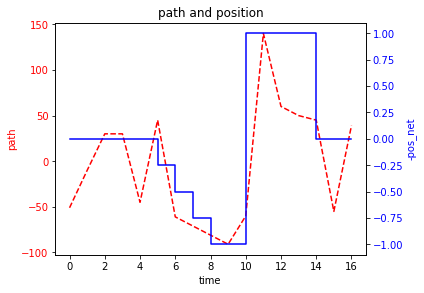


===== path_1d_a  bb_flag= True =====
---- multi_strat:
0 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-59. -39.  41.  61.]
1 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-69. -39.  41.  71.]
2 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-79. -39.  41.  81.]
3 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-89. -39.  41.  91.]
--- df_:
    path pos_0 pos_1 pos_2 pos_3 pos_net pnl_net
0    -51  0.25  0.25  0.25  0.25       1       -
1    -10     -     -     -     -       -      41
2     30     -     -     -     -       -       -
3     30     -     -     -     -       -       -
4    -45     -     -     -     -       -       -
5     45     -     -     -     -       -       -
6    -61  0.25     -     -     -    0.25       -
7    -71  0.25  0.25     -     -     0.5    -2.5
8    -81  0.25  0.25  0.25     -    0.75      -5
9    -91  0.25  0.25  0.25  0.25       1    -7.5
10   -60  0.25  0.25  0.25  0.25       1      31
11   140 -0.25 -0.25 -0

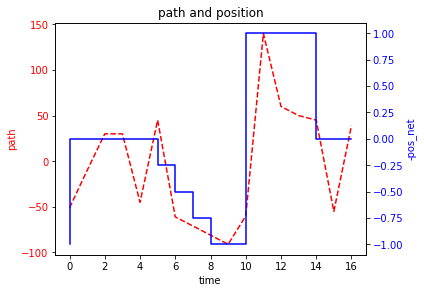


===== path_1d_b  bb_flag= False =====
---- multi_strat:
0 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-59. -39.  41.  61.]
1 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-69. -39.  41.  71.]
2 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-79. -39.  41.  81.]
3 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-89. -39.  41.  91.]
--- df_:
    path pos_0 pos_1 pos_2 pos_3 pos_net pnl_net
0    -61  0.25     -     -     -    0.25       -
1    -10     -     -     -     -       -   12.75
2     30     -     -     -     -       -       -
3     30     -     -     -     -       -       -
4    -45     -     -     -     -       -       -
5     45     -     -     -     -       -       -
6    -61  0.25     -     -     -    0.25       -
7    -71  0.25  0.25     -     -     0.5    -2.5
8    -81  0.25  0.25  0.25     -    0.75      -5
9    -91  0.25  0.25  0.25  0.25       1    -7.5
10   -60  0.25  0.25  0.25  0.25       1      31
11   140 -0.25 -0.

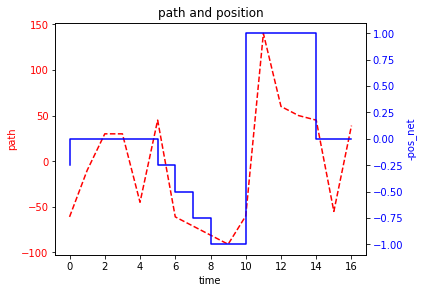


===== path_1d_b  bb_flag= True =====
---- multi_strat:
0 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-59. -39.  41.  61.]
1 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-69. -39.  41.  71.]
2 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-79. -39.  41.  81.]
3 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-89. -39.  41.  91.]
--- df_:
    path pos_0 pos_1 pos_2 pos_3 pos_net pnl_net
0    -61  0.25  0.25  0.25  0.25       1       -
1    -10     -     -     -     -       -      51
2     30     -     -     -     -       -       -
3     30     -     -     -     -       -       -
4    -45     -     -     -     -       -       -
5     45     -     -     -     -       -       -
6    -61  0.25     -     -     -    0.25       -
7    -71  0.25  0.25     -     -     0.5    -2.5
8    -81  0.25  0.25  0.25     -    0.75      -5
9    -91  0.25  0.25  0.25  0.25       1    -7.5
10   -60  0.25  0.25  0.25  0.25       1      31
11   140 -0.25 -0.25 -0

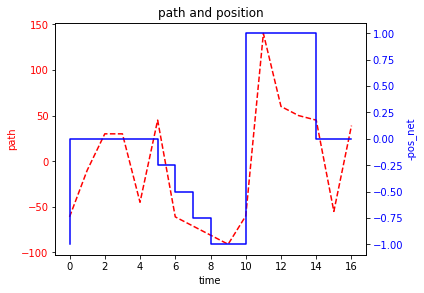


===== path_1d_c  bb_flag= False =====
---- multi_strat:
0 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-59. -39.  41.  61.]
1 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-69. -39.  41.  71.]
2 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-79. -39.  41.  81.]
3 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-89. -39.  41.  91.]
--- df_:
    path pos_0 pos_1 pos_2 pos_3 pos_net pnl_net
0    -71  0.25  0.25     -     -     0.5       -
1    -10     -     -     -     -       -    30.5
2     30     -     -     -     -       -       -
3     30     -     -     -     -       -       -
4    -45     -     -     -     -       -       -
5     45     -     -     -     -       -       -
6    -61  0.25     -     -     -    0.25       -
7    -71  0.25  0.25     -     -     0.5    -2.5
8    -81  0.25  0.25  0.25     -    0.75      -5
9    -91  0.25  0.25  0.25  0.25       1    -7.5
10   -60  0.25  0.25  0.25  0.25       1      31
11   140 -0.25 -0.

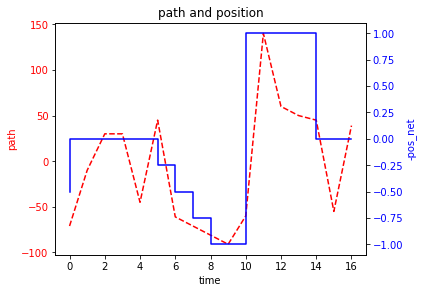


===== path_1d_c  bb_flag= True =====
---- multi_strat:
0 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-59. -39.  41.  61.]
1 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-69. -39.  41.  71.]
2 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-79. -39.  41.  81.]
3 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-89. -39.  41.  91.]
--- df_:
    path pos_0 pos_1 pos_2 pos_3 pos_net pnl_net
0    -71  0.25  0.25  0.25  0.25       1       -
1    -10     -     -     -     -       -      61
2     30     -     -     -     -       -       -
3     30     -     -     -     -       -       -
4    -45     -     -     -     -       -       -
5     45     -     -     -     -       -       -
6    -61  0.25     -     -     -    0.25       -
7    -71  0.25  0.25     -     -     0.5    -2.5
8    -81  0.25  0.25  0.25     -    0.75      -5
9    -91  0.25  0.25  0.25  0.25       1    -7.5
10   -60  0.25  0.25  0.25  0.25       1      31
11   140 -0.25 -0.25 -0

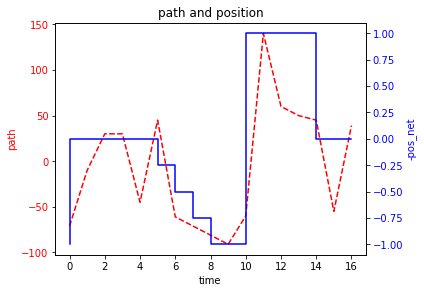


===== path_1d_d  bb_flag= False =====
---- multi_strat:
0 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-59. -39.  41.  61.]
1 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-69. -39.  41.  71.]
2 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-79. -39.  41.  81.]
3 : (max_hp, bb_flag, qty_, barriers)= 100 , False , 0.25 , [-89. -39.  41.  91.]
--- df_:
    path pos_0 pos_1 pos_2 pos_3 pos_net pnl_net
0    -81  0.25  0.25  0.25     -    0.75       -
1    -10     -     -     -     -       -   53.25
2     30     -     -     -     -       -       -
3     30     -     -     -     -       -       -
4    -45     -     -     -     -       -       -
5     45     -     -     -     -       -       -
6    -61  0.25     -     -     -    0.25       -
7    -71  0.25  0.25     -     -     0.5    -2.5
8    -81  0.25  0.25  0.25     -    0.75      -5
9    -91  0.25  0.25  0.25  0.25       1    -7.5
10   -60  0.25  0.25  0.25  0.25       1      31
11   140 -0.25 -0.

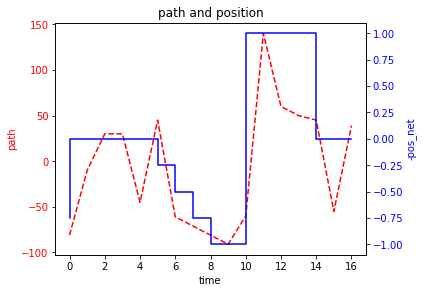


===== path_1d_d  bb_flag= True =====
---- multi_strat:
0 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-59. -39.  41.  61.]
1 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-69. -39.  41.  71.]
2 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-79. -39.  41.  81.]
3 : (max_hp, bb_flag, qty_, barriers)= 100 , True , 0.25 , [-89. -39.  41.  91.]
--- df_:
    path pos_0 pos_1 pos_2 pos_3 pos_net pnl_net
0    -81  0.25  0.25  0.25  0.25       1       -
1    -10     -     -     -     -       -      71
2     30     -     -     -     -       -       -
3     30     -     -     -     -       -       -
4    -45     -     -     -     -       -       -
5     45     -     -     -     -       -       -
6    -61  0.25     -     -     -    0.25       -
7    -71  0.25  0.25     -     -     0.5    -2.5
8    -81  0.25  0.25  0.25     -    0.75      -5
9    -91  0.25  0.25  0.25  0.25       1    -7.5
10   -60  0.25  0.25  0.25  0.25       1      31
11   140 -0.25 -0.25 -0

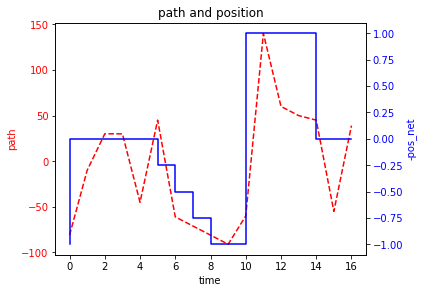

In [0]:
def path_multi_strat_to_pnl_testme_A():
  #-----------------
  #
  #-----------------
  path_1d_a       = np.array([ -51 , -10, 30, 30, -45, 45, -61, -71, -81, -91, -60, 140, 60, 50, 45, -55, 39])
  path_1d_b       = np.array([ -61 , -10, 30, 30, -45, 45, -61, -71, -81, -91, -60, 140, 60, 50, 45, -55, 39])
  path_1d_c       = np.array([ -71 , -10, 30, 30, -45, 45, -61, -71, -81, -91, -60, 140, 60, 50, 45, -55, 39])
  path_1d_d       = np.array([ -81 , -10, 30, 30, -45, 45, -61, -71, -81, -91, -60, 140, 60, 50, 45, -55, 39])
  #-----------------
  
  for (path_1d, id_, bb_flag) in [
      (path_1d_a, 'path_1d_a', False),
      (path_1d_a, 'path_1d_a', True),
      
      (path_1d_b, 'path_1d_b', False),
      (path_1d_b, 'path_1d_b', True),
      
      (path_1d_c, 'path_1d_c', False),
      (path_1d_c, 'path_1d_c', True),
      
      (path_1d_d, 'path_1d_d', False),
      (path_1d_d, 'path_1d_d', True)
  ]:
    max_hp  = 100  # 100 11
    qty_    = .25
    unit    = 10.
    center  = 1.
    
    cls_shrt_ = 4.
    open_iter = range(6, 10)
    multi_strat_A = create_mult_strat_LS_4_barr_A(center, unit, cls_shrt_, open_iter, bb_flag, max_hp, qty_)
    
    # vary opn_shrt_
    opn_shrt_u_array = [
      (cls_shrt_, 6., bb_flag, max_hp, qty_),
      (cls_shrt_, 7., bb_flag, max_hp, qty_),
      (cls_shrt_, 8., bb_flag, max_hp, qty_),
      (cls_shrt_, 9., bb_flag, max_hp, qty_)    
    ]
    multi_strat_ = create_mult_strat_LS_4_barr(center, unit, opn_shrt_u_array)
    
    N_multi_strat_ = get_size_multi_strat(multi_strat_)
    
    qty_1d = np.zeros(N_multi_strat_)
    get_qty_multi_strat(multi_strat_, qty_1d)
    
    pos_ind_1d    = np.zeros(path_1d.size)
    pnl_net_1d    = np.zeros(path_1d.size)
    pnl_A_1d      = np.zeros(N_multi_strat_)
    
    df_ = pd.DataFrame()
    debug_flag = False
    path_multi_strat_to_pnl(
      multi_strat_,
      path_1d, pos_ind_1d,pnl_net_1d,pnl_A_1d,
      df_, debug_flag        
    )
    pnl_net_this_sim_M = np.dot(pnl_A_1d, qty_1d)

    assert abs(pos_ind_1d[-1])<.000000001 #!!!!!

    print('\n=====', id_, ' bb_flag=', bb_flag, '=====')
    print_multi_strat(multi_strat_)
    
    print('--- df_:')
    #print(df_[['path', 'pos_net', 'pnl_net']].replace(0., '-'))
    print(df_[['path','pos_0','pos_1','pos_2','pos_3','pos_net','pnl_net']].replace(0., '-'))

    #color: 'tab:red'  'tab:blue'
    if 1==1:
      draw_twin_graph(
        range(path_1d.size),  'time',
        df_['path'],          'path',   '--',    'r',
        -df_['pos_net'],      '-pos_net', '' ,  'b',
        'path and position'
      )

    #end if
  #end for
  
#end def
path_multi_strat_to_pnl_testme_A()

In [0]:
def path_single_strat_to_pnl_testme_B(bb_flag):
 
  single_strat_     = Strategy_LS_4_barr( -50, -40, 40, 50 )
  
  path_1d       = np.array([ 20 , -10, 30, 30, -45, 45, -61, -71, -81, -91, -60, 140, 60, 50, 45, -55, 39]) 
  path_1d       = np.array([ -71 , -10, 30, 30, -45, 45, -61, -71, -81, -91, -60, 140, 60, 50, 45, -55, 39]) 
  pos_ind_1d    = np.zeros(path_1d.size)
  pnl_net_1d    = np.zeros(path_1d.size)
  
  max_hp  = 100
  max_hp  = 11
  
  #-------------------
  #
  #-------------------
  detailed_flag = True   # True False
  debug_flag    = False  # True False        

  pnl_net_this_sim_S = path_single_strat_to_pnl(
    single_strat_,
    path_1d, 
    pos_ind_1d, bb_flag, pnl_net_1d,
    max_hp,
    detailed_flag,
    debug_flag        
  )
  assert abs(pos_ind_1d[-1])<.000000001 #^^^^^^^
  if 1==1:
    pnl_1d_tmp = np.zeros(pnl_net_1d.size)
    pos_path_to_pnl(path_1d, pos_ind_1d, pnl_1d_tmp)
    for i_, (a_,b_) in enumerate(zip_longest(pnl_1d_tmp, pnl_net_1d)):
      diff_=a_-b_
      #print('i=', i_, ' pos_=', pos_ind_1d[i_], ' a_=', a_, ' b_=', b_, ' diff_=', diff_)
      assert abs(diff_)<.0000000000001 #asdf
    #end for
  #end if
  #-------------------

  #-------------------
  #
  #-------------------
  if 1==1:
    qty_ = .6
    pnl_A_1d = np.zeros(1)
    df_ = pd.DataFrame()
    debug_flag = False
    path_multi_strat_to_pnl(
      [(single_strat_, bb_flag, max_hp, qty_)],
      path_1d, pos_ind_1d,pnl_net_1d,pnl_A_1d,
      df_, debug_flag        
    )
    assert abs(pnl_A_1d[0] - pnl_net_this_sim_S) < .0000000000001
    assert abs(pos_ind_1d[-1])<.000000001 #*****
    
    print('\n-=-=-=-=-df_:')
    print(df_)
  #end if
  #-------------------
  
  
#end def

bb_flag = False; path_single_strat_to_pnl_testme_B(bb_flag)
bb_flag = True;  path_single_strat_to_pnl_testme_B(bb_flag)


-=-=-=-=-df_:
    path  pos_0  pnl_0  pos_net  pnl_net
0    -71    0.6    0.0      0.6      0.0
1    -10    0.0   36.6      0.0     36.6
2     30    0.0    0.0      0.0      0.0
3     30    0.0    0.0      0.0      0.0
4    -45    0.0   -0.0      0.0     -0.0
5     45    0.0    0.0      0.0      0.0
6    -61    0.6   -0.0      0.6     -0.0
7    -71    0.6   -6.0      0.6     -6.0
8    -81    0.6   -6.0      0.6     -6.0
9    -91    0.6   -6.0      0.6     -6.0
10   -60    0.6   18.6      0.6     18.6
11   140    0.0  120.0      0.0    120.0
12    60    0.0    0.0      0.0      0.0
13    50    0.0    0.0      0.0      0.0
14    45    0.0    0.0      0.0      0.0
15   -55    0.0    0.0      0.0      0.0
16    39    0.0    0.0      0.0      0.0

-=-=-=-=-df_:
    path  pos_0  pnl_0  pos_net  pnl_net
0    -71    0.6    0.0      0.6      0.0
1    -10    0.0   36.6      0.0     36.6
2     30    0.0    0.0      0.0      0.0
3     30    0.0    0.0      0.0      0.0
4    -45    0.0   -0.0     

In [0]:
def get_file_names(post_=''):
  file_s = './mean_rev_ls_strat_s_out' + post_ + '.csv'
  file_m = './mean_rev_ls_strat_m_out' + post_ + '.csv'
  return (file_s, file_m)
#end def

def get_type_tags():
  type_single     = 'single'
  type_multi_equi = 'multi_equi'
  type_multi_opti = 'multi_opti'
  return (type_single, type_multi_equi, type_multi_opti)
#end def

def get_my_tag_multi(close_, open_iter):
  return '(%d, '%(close_) + str(open_iter) + ')'
#end def

def get_my_tag_single(close_, open_):
  return '(%d, '%(close_) + str(open_) + ')'
#end def

def get_my_tag_proc(S0_x, level_x, half_life, std_normal_mult):
  return '(%.0f,%.0f,%.0f)'%(S0_x, level_x, half_life)
#end def

def get_my_tag(S0_x, level_x, half_life, std_normal_mult, close_, open_iter):
  
  pre_ = '(S0,L,H)=' + get_my_tag_proc(S0_x,level_x,half_life,std_normal_mult) + '~'
  this_multi_tag   =  pre_ + get_my_tag_multi(close_, open_iter) + '~'
  this_single_tags = [pre_ + get_my_tag_single(close_, open_)    + '~' for open_ in open_iter]
  
  return (this_single_tags, this_multi_tag)
#end def


In [0]:
from scipy.optimize import minimize

#------------------------------
# main simulation loop
#------------------------------
def all_path_multi_strat_to_pnl( 
    path_2d_u, 
    multi_strat_u,
    pnl_A_2d_u,
    debug_flag_x
):
  
  N_sim_u     = path_2d_u.shape[0]
  N_periods   = path_2d_u.shape[1]
  
  pos_ind_1d  = np.zeros(N_periods)
  pnl_net_1d  = np.zeros(N_periods)

  #------------------
  #
  #------------------
  for sim in range(0,N_sim_u):

    debug_flag_v = debug_flag_x and (2934==sim)
    if debug_flag_v: print('Calling path_multi_strat_to_pnl')
    df_ = None
    
    path_multi_strat_to_pnl(
      multi_strat_u,
      path_2d_u[sim,:], 
      pos_ind_1d,
      pnl_net_1d, 
      pnl_A_2d_u[sim,:],
      df_, debug_flag_v        
    )
  #end for (end of simulation loop)
  #------------------
#end def


def calc_opt_wts_for_this_multi_strat(
    multi_strat_u, 
    path_2d_u, 
    N_buckets, 
    single_tags,open_iter,
    init_qty, opti_qty,
    debug_flag_ 
):
  
  plot_single_strat_flag = False # True False
  plot_multi_strat_flag  = False # True False
  
  #--------------------
  #
  #--------------------
  (q_1d_cmean, q_labels_cmean, q_labels_cmean_n) = get_std_cmean_grid()
  (type_single, type_multi_equi, type_multi_opti) = get_type_tags()
  #--------------------

  #------------------
  #
  #------------------
  (N_sim, _)     = path_2d_u.shape
  N_multi_strat_ = get_size_multi_strat(multi_strat_u)
  pnl_A_2d_all   = np.zeros( (N_sim, N_multi_strat_) )
  #------------------
  
  #------------------
  #
  #------------------
  ts = dt.now()
  all_path_multi_strat_to_pnl( 
      path_2d_u, 
      multi_strat_u,
      pnl_A_2d_all,
      debug_flag_
  )
  (ts, str_pnl) = get_time_diff(ts); #print('str_pnl:', str_pnl)
  #------------------

  #------------------
  #
  #------------------
  stat = Mystats(N_sim, N_buckets)
  #------------------
  
  all_rows = []
  hdr      = None
  i_valid_max = None
  for i in range(N_multi_strat_):
    
    arr_ = pnl_A_2d_all[:,i]
    
    #-------------------
    # calc moments and quantiles
    #------------------- 
    (wts_1d,cmean_1d,cmean_1d_n)  = stat.calc_cmean3(arr_, q_1d_cmean)
    if True==plot_single_strat_flag: my_qq_qv_plot(stat,q_1d_cmean,cmean_1d, cmean_1d_n)
    #-------------------    
    
    #-------------------
    #
    #------------------- 
    (mean_, std_, SR_)           = stat.get_mean_std_sr()
    (r2_score, intercept, slope) = stat.calc_r2_inter_slope()
    if i_valid_max is None:
      if SR_ is None: i_valid_max = i
    #end if
    #------------------- 
    
    #-------------------
    #
    #-------------------     
    row_id = single_tags[i]
    open_  = open_iter[i]
    
    this_row = [row_id, type_single, mean_, std_, SR_, r2_score, intercept, slope, open_]
    this_row.extend(cmean_1d)
    this_row.extend(cmean_1d_n)
    this_row.extend([None])
    
    all_rows.append(this_row)
    if hdr is None:
      hdr = ['row_id', 'type', 'mean_', 'std_', 'SR_', 'QQ_r2', 'QQ_inter', 'QQ_slope', 'open_L']
      hdr.extend(q_labels_cmean)
      hdr.extend(q_labels_cmean_n)
      hdr.extend(['wt_vec'])
    #end if
    #------------------- 
    
  #end for
  if i_valid_max is None: i_valid_max = N_multi_strat_
  df_single = pd.DataFrame(data=all_rows, columns=hdr)
  #------------------

  qty_1d_all = np.zeros(N_multi_strat_)
  get_qty_multi_strat(multi_strat_u, qty_1d_all)  

  #---------------------
  # truncate
  #---------------------
  qty_1d = np.zeros(i_valid_max)
  qty_1d[:] = qty_1d_all[:i_valid_max]
  
  pnl_A_2d_= np.empty((N_sim,i_valid_max))
  pnl_A_2d_[:,:] = pnl_A_2d_all[:,:i_valid_max]
  #---------------------

  #------------------
  # minimize -SR
  #------------------
  ts = dt.now()
  def min_func(qty_1d__):
    abc = np.dot(pnl_A_2d_, qty_1d__)
    (mean_, std_, SR_) = get_mean_std_sr(abc)
    return -SR_
  #end def
  
  bounds = [(0, None)  for _ in qty_1d]
  result = minimize(min_func, qty_1d, bounds=bounds, options={'disp': True}) #initial_guess = qty_1d
  assert True==result.success
  
  if 1==0:
    print('result.message:', result.message)
    print('result.success:', result.success)
    print('result.x:',       result.x)
    print('result.fun:',     result.fun)
  #end if
  (ts, str_minimize) = get_time_diff(ts); #print('str_minimize:', str_minimize)  
  #------------------
  
  
  #------------------
  #
  #------------------
  all_rows = []
  for (row_marker, type_, wt_1d) in [
      (init_qty, type_multi_equi, qty_1d), 
      (opti_qty, type_multi_opti, result.x)
  ]:
    
    # inner prod of (N_sim x Nstrats) 2d pnl matrix and weights
    pnl_net_all_sim_1d = np.dot(pnl_A_2d_, wt_1d)
    
    #-------------------
    # calc moments and quantiles
    #-------------------  
    (wts_1d, cmean_1d,cmean_1d_n) = stat.calc_cmean3(pnl_net_all_sim_1d, q_1d_cmean)
    if True==plot_multi_strat_flag: my_qq_qv_plot(stat, q_1d_cmean, mean_1d,mean_1d_n)
    #-------------------    
    
    # create a row with moments
    (mean_, std_, SR_)           = stat.get_mean_std_sr()
    (r2_score, intercept, slope) = stat.calc_r2_inter_slope()
    this_row = [row_marker, type_, mean_, std_, SR_, r2_score, intercept, slope, None]
    
    # add quantiles
    this_row.extend(cmean_1d)
    this_row.extend(cmean_1d_n)
    this_row.extend([wt_1d])
    
    # append 'this_row' to 'all_rows'
    all_rows.append(this_row)
  #end for
  df_multi = pd.DataFrame(data=all_rows, columns=hdr)  
  #------------------
  
  
  return (df_single, df_multi)
  
#end def

def normalize_df(df, normalizing_col, new_col, col_list):
  
  assert new_col  not in col_list
  assert normalizing_col in col_list
  
  df[new_col]  = 1./ df[normalizing_col]
  df_cols = df.columns
  for col_ in col_list:
    if col_ in df_cols:
      df[col_] *= df[new_col]
    else:
      ; #print('Could not find col=[', col_, '] in df_col')
    #end if
  #end for
  
  # 1. drop normalizing_col
  df.drop(columns=[normalizing_col], inplace=True)
  
  # 2. rename 'mean_' to 'Sharpe'
  df.rename(columns={'mean_':'Sharpe'}, inplace=True)
  
  assert np.allclose(df['Sharpe'],df['SR_'])
  df.drop(columns=['SR_'], inplace=True)
    
#end def

def normalize_stuff(df_sx, df_mx):
  
  normalizing_col = 'std_'
  
  (q_in_1d, q_labels, q_labels_n) = get_std_cmean_grid()
  #col_list = ['mean_', 'std_', 'shortfall', 'most_likely', 'windfall','wt_vec', 'QQ_inter', 'QQ_slope']
  col_list = ['mean_', 'std_']
  col_list.extend(q_labels)
  col_list.extend(q_labels_n)
  col_list.extend(['wt_vec', 'QQ_inter', 'QQ_slope'])
  
  new_col = 'qty_'
  normalize_df(df_sx, normalizing_col, new_col, col_list)
  normalize_df(df_mx, normalizing_col, new_col, col_list)

  SR_ = 'Sharpe'
  df_sx.sort_values([SR_], ascending=[False], inplace=True)
  df_mx.sort_values([SR_], ascending=[False], inplace=True)

#end def

  
def run_this_OU_proc(
    N_sim, N_periods,seed, 
    S0_x, level_x, half_life, std_normal_mult, 
    max_hp, 
    X_Y_iter_equi, equi_SR_iter,
    X_Y_iter_opti, opti_SR_iter
):
  
  #------------------
  #
  #------------------
  path_2d = np.zeros((N_sim, N_periods))
  generate_path_2d_OU(S0_x, level_x, half_life, std_normal_mult, path_2d, seed, 1)    
  #------------------
  
  #------------------
  #
  #------------------
  wt_level = 0.5
  half_line = ((1. - wt_level) * S0_x) + (wt_level*level_x)
  if 1==0:
    center = level_x
  else:
    center = half_line
  #end if
  #------------------
  
  #------------------
  #
  #------------------
  proc_tag = get_my_tag_proc(S0_x, level_x, half_life, std_normal_mult)
  print('=============================')
  print('(S0,L,H)=' + proc_tag + ' (N_sim=%d, seed=%d)'%(N_sim, seed))
  print('=============================')
  #------------------
  
  
  #------------------
  #
  #------------------
  bb_flag     = True # True False
  qty_        = 1.
  debug_flag_ = False # False True
  
  N_buckets   = 200
  unit        = 0.25
  
  #--------------------
  #
  #--------------------
  open_H = 24
  open_S = 2
    
  aRange = range(1,5)
  aRange = range(1,11)
  close_openL_list = list(product(aRange, aRange))
  aList = []
  for (c_,o_) in close_openL_list:
    diff_ = o_ - c_
    flag_ = (0 <  diff_)
    flag_ = (1 == diff_)
    if flag_: 
      aList.append((c_,range(o_,open_H,open_S)))
    #end if
  #end for
  #--------------------
  
  df_single_iter = []
  df_multi_iter  = []
  for (close_, open_iter) in aList:
    
    #---------------------
    #
    #---------------------
    open_L = open_iter[0]
    open_H = int(1 + open_iter[-1])
    
    (single_tags, this_multi_tag) \
      = get_my_tag(S0_x, level_x, half_life, std_normal_mult, close_, open_iter)
    #---------------------
    
    #---------------------
    #
    #---------------------
    multi_strat_ =  create_mult_strat_LS_4_barr_A(
      center, unit, close_, open_iter,
      bb_flag, max_hp, qty_
    )
    #---------------------
    
    #---------------------
    #
    #---------------------
    single_tags = [x_ + 'single~' for x_ in single_tags]
    init_qty    = this_multi_tag + 'equi~'  # 'equi_wtd'
    opti_qty    = this_multi_tag + 'opti~'  # 'opti_wtd'
        
    (df_single, df_multi) = calc_opt_wts_for_this_multi_strat(
        multi_strat_, path_2d, 
        N_buckets, 
        single_tags,open_iter,
        init_qty, opti_qty,
        debug_flag_
    )
    #---------------------
    
    (Nr_s, Nc_s) = df_single.shape
    (Nr_m, Nc_m) = df_multi.shape
    assert 2==Nr_m
    
    #---------------------
    #
    #---------------------
    df_single = df_single[ 0.0000000001 < abs(df_single['std_']) ]
    df_multi  = df_multi[  0.0000000001 < abs(df_multi['std_'])  ]
    normalize_stuff(df_single, df_multi)
    #---------------------
    
    #---------------------
    #
    #---------------------
    debug_flag = False #(10==half_life) & (2==close_) & ((3, 24.0, 2.0)==(open_L,open_H,open_S))
    plot_flag  = False  # False True
    (type_single, type_multi_equi, type_multi_opti) = get_type_tags()
    fill_X_Y_iter_equi_opti(
        df_multi, this_multi_tag, open_iter,
        type_multi_equi, X_Y_iter_equi,equi_SR_iter,
        type_multi_opti, X_Y_iter_opti,opti_SR_iter,
        debug_flag, plot_flag
    )
    #---------------------
    
    #---------------------
    #
    #---------------------
    df_single['center']    = center
    df_single['unit']      = unit
    df_single['close_']    = close_
    ##### df_single['open_L']    = open_iter
    df_single['open_H']    = None 
    df_single['open_S']    = None 
    df_single['open_iter'] = None 
    df_single_iter.append(df_single)
    
    df_multi['center']    = center
    df_multi['unit']      = unit    
    df_multi['close_']    = close_
    df_multi['open_L']    = open_L
    df_multi['open_H']    = open_H
    df_multi['open_S']    = open_S
    df_multi['open_iter'] = str(open_iter)
    df_multi_iter.append(df_multi)
    #---------------------
    
    if 1==0:
      print('df_single:\n', df_single)
      print('df_multi:\n',  df_multi)
    #end if
        
  #end for
  
  #---------------------
  #
  #---------------------
  if 1==0:
    plot_X_Y_iter_init_opti(X_Y_iter_init, X_Y_iter_opti)
  #end if
  #---------------------
  

  df_single_a = pd.concat(df_single_iter)
  df_multi_a  = pd.concat(df_multi_iter)
  
  SR_ = 'Sharpe'
  df_single_a.sort_values([SR_], ascending=False, inplace=True)
  df_multi_a .sort_values([SR_], ascending=False, inplace=True)
  
  if 1==0:
    plot_Sharpe_ratios(df_single_a, df_multi_a)
  #end if
 
  #------------------
  #
  #------------------
  (Nr_bef, Nc_bef) = df_single_a.shape
  df_single_a.drop_duplicates(inplace=True)
  (Nr_aft, Nc_aft) = df_single_a.shape
  assert Nr_bef == Nr_aft
  
  return (df_single_a, df_multi_a)
  #------------------

#end def


def run_this_proc_iter(proc_iter, max_hp, N_periods, seed, N_sim):
  
  
  print('len(proc_iter):', len(proc_iter))

  ts = dt.now()
  (df_s_iter, df_m_iter) = ([], [])
  X_Y_iter_equi, equi_SR_iter = [], []
  X_Y_iter_opti, opti_SR_iter = [], []
  for i, proc_tuple in enumerate(proc_iter):
    #------------------
    #
    #------------------
    (S0, level, half_life, std_normal_mult) = proc_tuple
    #------------------

    #------------------
    #
    #------------------
    (df_s, df_m) = run_this_OU_proc(
        N_sim, N_periods,seed, 
        *proc_tuple, 
        max_hp, 
        X_Y_iter_equi, equi_SR_iter,
        X_Y_iter_opti, opti_SR_iter
    )
    #------------------
    
    if 1==0:
      title_equi =   'equally weighted, ****'
      title_opti = 'optimally weighted, ****'
      plot_X_Y_iter_init_opti(X_Y_iter_equi, X_Y_iter_opti, title_equi, title_opti)
    #end if
    
    
    #------------------
    #
    #------------------
    for df_x in [df_s, df_m]:
      , , 
      df_x['N_periods'] = N_periods
      df_x['seed']      = seed
      df_x['N_sim']     = N_sim
      df_x['max_hp']    = max_hp
     
      df_x['S0']        = S0
      df_x['level']     = level
      df_x['half_life'] = half_life
      df_x['std_normal_mult'] = std_normal_mult
    #end for
    df_s_iter.append(df_s)
    df_m_iter.append(df_m)
    #------------------
    
  #end for
  df_s_ = pd.concat(df_s_iter)
  df_m_ = pd.concat(df_m_iter)
  
  #---------------------
  #
  #---------------------
  N_sim, N_periods, seed
  print('N_sim, N_periods, seed:', N_sim, N_periods, seed)
  (ts, str_) = get_time_diff(ts); print('str_:', str_) 
  
  return (df_s_,df_m_)
  #---------------------
#end def

def main_opt():
  
  #------------------
  #
  #------------------
  (N_periods, seed, N_sim) = (126, 23, 200       )
  (N_periods, seed, N_sim) = (126, 23, 1*(10**4) )
  
  max_hp  = 100  # 100 11
  #------------------
  
  #------------------
  #
  #------------------
  half_life_iter = []
  half_life_iter.append( ( 5., '_0') )
  half_life_iter.append( (10., '_1') )
  half_life_iter.append( (25., '_2') )
  #------------------
  
  #------------------
  #
  #------------------
  for (half_life, file_post_) in half_life_iter:
    #----------------
    #
    #----------------
    proc_iter = []
    for (S0, level, std_normal_mult) in [
        ( 5.,  0.,  1.),  # 'S0' above 'level'
        (-5.,  0.,  1.),  # 'S0' below 'level'
        ( 0.,  0.,  1.)   # 'S0'   =   'level'
    ]:
        proc_iter.append((S0, level, half_life, std_normal_mult)) 
    #end for
    (df_s_,df_m_) = run_this_proc_iter(proc_iter, max_hp, N_periods, seed, N_sim)
    #----------------
    #
    #----------------
    (file_s, file_m) = get_file_names(file_post_)
    df_s_.to_csv(file_s,index=False)
    df_m_.to_csv(file_m,index=False)
    #----------------
  #end for
  #------------------
  
#end if



In [0]:
# (xlabel,ylabel) = get_common_xy_labels()
def get_common_xy_labels():
  xlabel = 'asset (norm. dist from center)'
  ylabel = 'net qty held'
  return (xlabel,ylabel)
#end def

def plot_X_Y_iter_init_opti(X_Y_iter_equi_u, X_Y_iter_opti_u, title_equi, title_opti):
  
  (xlabel,ylabel) = get_common_xy_labels()
  
  N_equi = len(X_Y_iter_equi_u); assert 0 < N_equi
  N_opti = len(X_Y_iter_opti_u); assert 0 < N_opti
  
  f, (ax_0, ax_1) = plt.subplots(1, 2, sharex=True, sharey=True)
  f.set_figheight(4); f.set_figwidth(15)  
  
  ax_0.yaxis.tick_right()
  ax_0.yaxis.set_ticks_position('both')

  for (X_Y_iter_, ax, title_) in [
      (X_Y_iter_equi_u,ax_0, title_equi), 
      (X_Y_iter_opti_u,ax_1, title_opti)
  ]:
    for (X_,Y_,label_,marker_) in X_Y_iter_:
      ax.plot(X_,Y_,label=label_,marker=marker_)
    #end for
    show_label_title(ax, xlabel, ylabel, title_)
    show_grid(ax)
    bbox_to_anchor=(0.05, -0.15)  # (1.04,1) (0.05, -0.1)
    ax.legend(bbox_to_anchor=bbox_to_anchor, loc="upper left")
  #end for
  plt.show()
#end def
def from_string_to_array( str_, sep=' ' ):
  assert '[' == str_[0]
  assert ']' == str_[-1]
  # strip off leading '[' and trailing ']'
  str_ = str_[1:-1]
  return np.fromstring(str_,dtype=float,sep=sep)
#end def
if 1==0:
  from_string_to_array('[1.,2.,3.]')
#end if

def extract_wt_vec( row_, debug_flag ):
  val__ = row_['wt_vec'].values; [val__] = val__;
    
  if debug_flag: print('\n=before val__:', val__)
  if isinstance(val__,str): val__ = from_string_to_array(val__)
  if debug_flag: print('=after  val__:', val__)
    
  return val__
#end def

def get_col_fmt_pair_iter():
  col_fmt_pair_iter = [
      ('QQ_r2',        ' $R^2$=%.2f')
      ,('Sharpe',         ',SR=%.2f')
      ,('shortfall',   ',(%.2f')
      ,('most_likely', ', %.2f')
      ,('windfall',    ', %.2f)')
  ] 
  return col_fmt_pair_iter
#end def


def get_misc_ratios(row_):
  ret_val = ''
  col_fmt_pair_iter = get_col_fmt_pair_iter()
  for (col_,tag_) in col_fmt_pair_iter:
    ret_val += tag_ % row_[col_].values
  #end for
  return ret_val
#end def

def fill_helper(__row, pre_label, X_Y_iter_x, SR_iter,open_iter,debug_flag):
  
  assert 1==__row.shape[0]
  pre_label += get_misc_ratios(__row)
  
  u__= extract_wt_vec( __row, debug_flag ); u__ = u__.cumsum()
  _SR_ = __row['Sharpe'].values; [_SR_] = _SR_

  N_ = u__.size
  assert len(open_iter)==N_
  X_ = open_iter[:N_]
  SR_iter.append(_SR_); 
  X_Y_iter_x.append((X_, u__, pre_label, 'x'))
  

  if debug_flag:
    for (x_,y_) in zip_longest(X_, u__):
      print('fill_X_Y_iter_equi_opti::x_,y_:', x_,y_)
    #end for
  #end if
  
  
#end def


def fill_X_Y_iter_equi_opti(
  df_mul_x, this_tag, open_iter,
  type_multi_equi, X_Y_iter_equi_x, equi_SR_iter,
  type_multi_opti, X_Y_iter_opti_x, opti_SR_iter,
  debug_flag, plot_flag
):
  #-----------------
  #
  #-----------------
  #print('df_mul_x.shape[0]:', df_mul_x.shape[0])
  assert 2==df_mul_x.shape[0]
  #-----------------
  
  #-----------------
  #
  #-----------------
  __row = df_mul_x[type_multi_equi==df_mul_x['type']]
  fill_helper(
      __row, 
      this_tag + 'equi', 
      X_Y_iter_equi_x, equi_SR_iter,
      open_iter, debug_flag
  )
  #-----------------
  
  #-----------------
  #
  #-----------------
  __row = df_mul_x[type_multi_opti==df_mul_x['type']]
  fill_helper(
      __row, 
      this_tag + 'opti', 
      X_Y_iter_opti_x, opti_SR_iter,
      open_iter, debug_flag
  )
  #-----------------

  
  #-----------------
  #
  #-----------------
  if plot_flag:
    plt.plot(X_, equi__, c='r', label=equi_label,marker='x')
    plt.plot(X_, opti__, c='b', label=opti_label,marker='o')
    show_grid(plt)
    show_label_title(plt,'x@@', 'y@@', 'title@@')
    bbox_to_anchor=(0.05, -0.15) # (1.04,1)
    plt.legend(bbox_to_anchor=bbox_to_anchor, loc="upper left")
    plt.show()
  #end if
  #-----------------
  
#end def


def plot_Sharpe_ratios(df_single_u, df_multi_u):

  #---------------
  # preapre data
  #---------------
  head_s = 3
  head_m = 6
  col_list = ['row_id','shortfall','Sharpe','most_likely','windfall']
  df_s_x = df_single_u[col_list].head(head_s)
  df_m_x = df_multi_u[col_list].head(head_m)

  df_x = pd.concat([df_s_x, df_m_x])
  df_x.sort_values(['Sharpe'], ascending=True, inplace=True)

  df_x.set_index('row_id', inplace=True)
  #print('df_x:\n', df_x)
  #---------------

  print('\n========')
  print('Plotting misc ratios: Sharpe, shortfall, most_likely and windfall:')
  print('========')
  #---------------
  # plot data
  #---------------
  (fig_width, fig_height) = (15,10)
  f, (ax_0, ax_1) = plt.subplots(2, 1, sharex=True)
  #f.set_figwidth(fig_width); 
  f.set_figheight(fig_height);
  for (df,     ax, ylabel, title_) in \
  [
      (df_x,   ax_0, 'Strat',      'Ratios grouped by strats'), 
      (df_x.T, ax_1, 'Ratio type', 'Ratios grouped by types')
  ]:
    df.plot.barh(ax=ax)
    
    show_label_title(ax, 'Ratio', ylabel, title_)
    show_grid3(ax, 'x')
    
    bbox_to_anchor = (1.04,1)
    ax.legend(bbox_to_anchor=bbox_to_anchor, loc="upper left")
  #end for
  plt.show()
  #---------------
  
#end def


len(proc_iter): 3
OU_process:: self.triple_= [0.         0.87055056 1.        ]
***  S0= 5.0  (N_sim, N_periods)= (10000, 126)  seed= 23
generate_path_2d:[1/10000]
generate_path_2d:[5001/10000]
Finished generating (10000, 126) paths


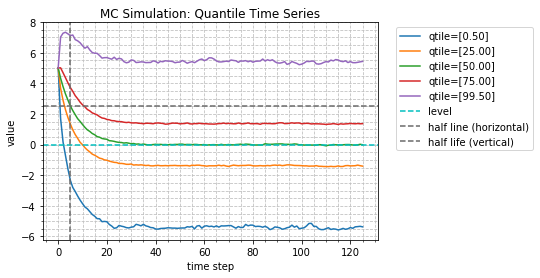

(S0,L,H)=(5,0,5) (N_sim=10000, seed=23)
OU_process:: self.triple_= [0.         0.87055056 1.        ]
***  S0= -5.0  (N_sim, N_periods)= (10000, 126)  seed= 23
generate_path_2d:[1/10000]
generate_path_2d:[5001/10000]
Finished generating (10000, 126) paths


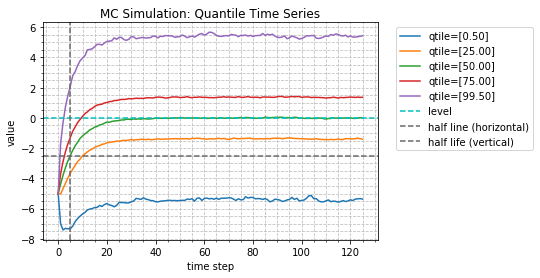

(S0,L,H)=(-5,0,5) (N_sim=10000, seed=23)
OU_process:: self.triple_= [0.         0.87055056 1.        ]
***  S0= 0.0  (N_sim, N_periods)= (10000, 126)  seed= 23
generate_path_2d:[1/10000]
generate_path_2d:[5001/10000]
Finished generating (10000, 126) paths


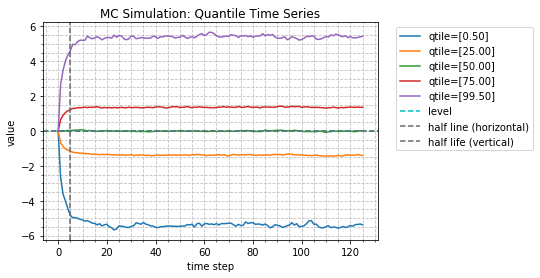

(S0,L,H)=(0,0,5) (N_sim=10000, seed=23)
N_sim, N_periods, seed: 10000 126 23
str_: elapsed time = 0:25:33.396326 (hh:mm:ss.ms)
len(proc_iter): 3
OU_process:: self.triple_= [0.         0.93303299 1.        ]
***  S0= 5.0  (N_sim, N_periods)= (10000, 126)  seed= 23
generate_path_2d:[1/10000]
generate_path_2d:[5001/10000]
Finished generating (10000, 126) paths


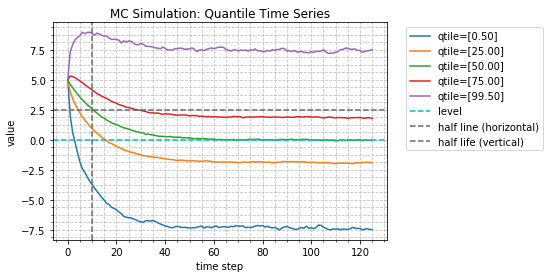

(S0,L,H)=(5,0,10) (N_sim=10000, seed=23)
OU_process:: self.triple_= [0.         0.93303299 1.        ]
***  S0= -5.0  (N_sim, N_periods)= (10000, 126)  seed= 23
generate_path_2d:[1/10000]
generate_path_2d:[5001/10000]
Finished generating (10000, 126) paths


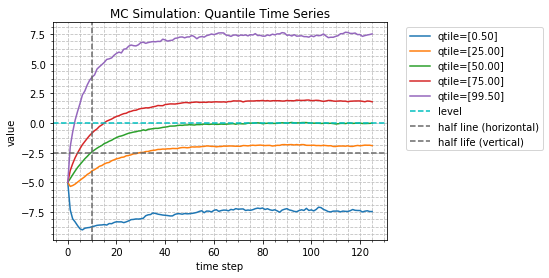

(S0,L,H)=(-5,0,10) (N_sim=10000, seed=23)
OU_process:: self.triple_= [0.         0.93303299 1.        ]
***  S0= 0.0  (N_sim, N_periods)= (10000, 126)  seed= 23
generate_path_2d:[1/10000]
generate_path_2d:[5001/10000]
Finished generating (10000, 126) paths


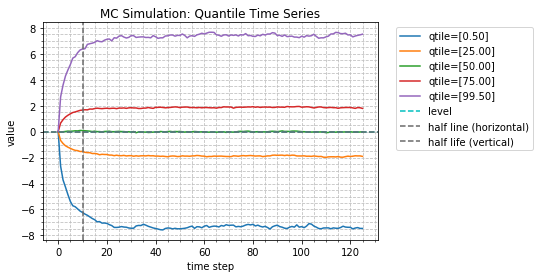

(S0,L,H)=(0,0,10) (N_sim=10000, seed=23)
N_sim, N_periods, seed: 10000 126 23
str_: elapsed time = 0:24:58.367663 (hh:mm:ss.ms)
len(proc_iter): 3
OU_process:: self.triple_= [0.         0.97265495 1.        ]
***  S0= 5.0  (N_sim, N_periods)= (10000, 126)  seed= 23
generate_path_2d:[1/10000]
generate_path_2d:[5001/10000]
Finished generating (10000, 126) paths


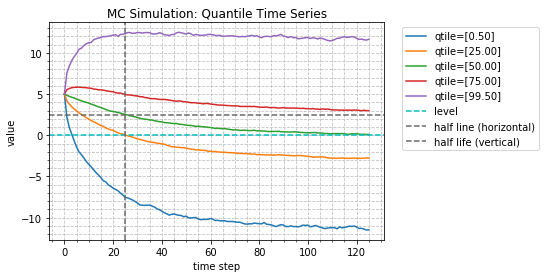

(S0,L,H)=(5,0,25) (N_sim=10000, seed=23)
OU_process:: self.triple_= [0.         0.97265495 1.        ]
***  S0= -5.0  (N_sim, N_periods)= (10000, 126)  seed= 23
generate_path_2d:[1/10000]
generate_path_2d:[5001/10000]
Finished generating (10000, 126) paths


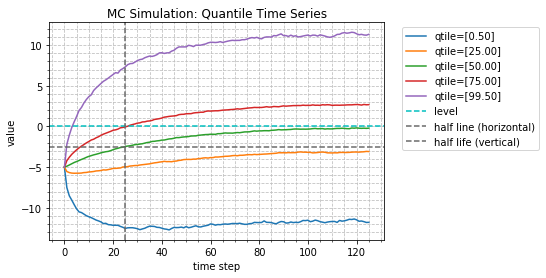

(S0,L,H)=(-5,0,25) (N_sim=10000, seed=23)
OU_process:: self.triple_= [0.         0.97265495 1.        ]
***  S0= 0.0  (N_sim, N_periods)= (10000, 126)  seed= 23
generate_path_2d:[1/10000]
generate_path_2d:[5001/10000]
Finished generating (10000, 126) paths


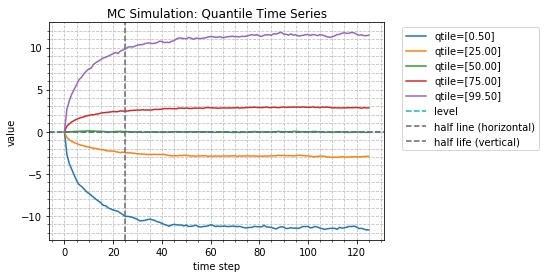

(S0,L,H)=(0,0,25) (N_sim=10000, seed=23)
N_sim, N_periods, seed: 10000 126 23
str_: elapsed time = 0:25:13.192492 (hh:mm:ss.ms)


In [0]:
if 1==1:
  main_opt()
#end if

./mean_rev_ls_strat_s_out_0.csv::(Nr_s, Nc_s)=(249,33)
./mean_rev_ls_strat_m_out_0.csv::(Nr_m, Nc_m)=(54,33)
./mean_rev_ls_strat_s_out_1.csv::(Nr_s, Nc_s)=(249,33)
./mean_rev_ls_strat_m_out_1.csv::(Nr_m, Nc_m)=(54,33)
./mean_rev_ls_strat_s_out_2.csv::(Nr_s, Nc_s)=(249,33)
./mean_rev_ls_strat_m_out_2.csv::(Nr_m, Nc_m)=(54,33)

==== Summary 1 =======
                                                  Sharpe                    
half_life                                           5.0       10.0      25.0
max_hp N_sim unit center S0   level type                                    
100    10000 0.25 -2.5   -5.0 0.0   multi_equi  3.548008  2.686607  1.671345
                                    multi_opti  3.721110  2.808029  1.716232
                                    single      2.839863  2.179967  1.453237
                   0.0    0.0 0.0   multi_equi  4.555868  3.502945  1.773685
                                    multi_opti  4.975998  3.739155  1.835254
                                 

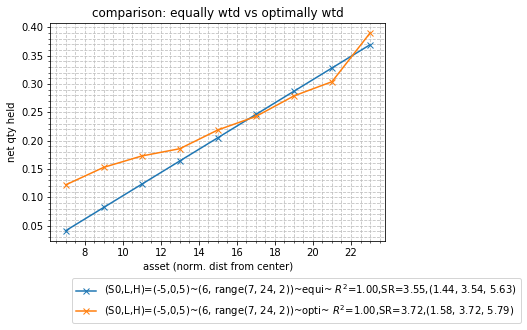

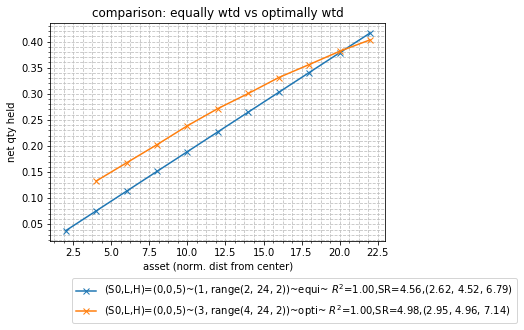

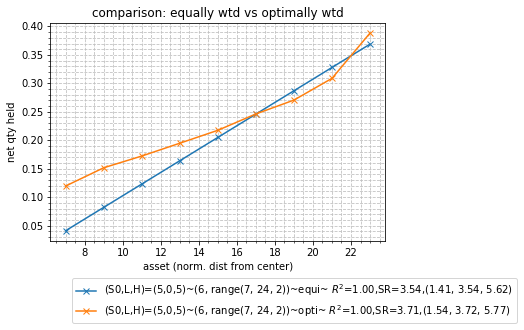


For half_life=<5.0> and type category **<multi_equi>**: strats with top Sharpe
 (S0,L,H)              strat_cd  shortfall    Sharpe  most_likely  windfall        type  center  unit
 (-5,0,5)  (6, range(7, 24, 2))   1.444827  3.548008     3.542206  5.630393  multi_equi    -2.5  0.25
  (0,0,5)  (1, range(2, 23, 2))   2.616793  4.555868     4.520453  6.792882  multi_equi     0.0  0.25
  (5,0,5)  (6, range(7, 24, 2))   1.409866  3.535493     3.539104  5.623967  multi_equi     2.5  0.25

For half_life=<5.0> and type category **<multi_opti>**: strats with top Sharpe
 (S0,L,H)              strat_cd  shortfall    Sharpe  most_likely  windfall        type  center  unit
 (-5,0,5)  (6, range(7, 24, 2))   1.578657  3.721110     3.722369  5.787770  multi_opti    -2.5  0.25
  (0,0,5)  (3, range(4, 23, 2))   2.948460  4.975998     4.956846  7.139193  multi_opti     0.0  0.25
  (5,0,5)  (6, range(7, 24, 2))   1.537614  3.707923     3.720411  5.768370  multi_opti     2.5  0.25

For half_life=<5.0> and

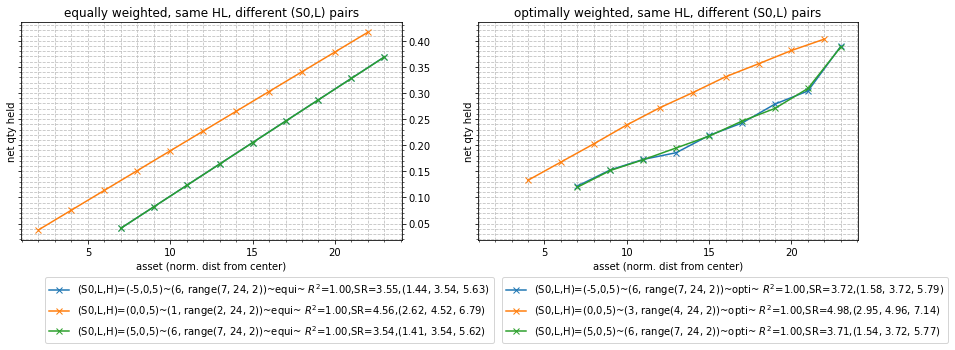

===== half_life=10 === 


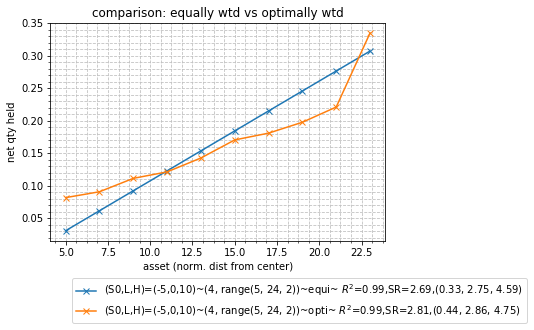

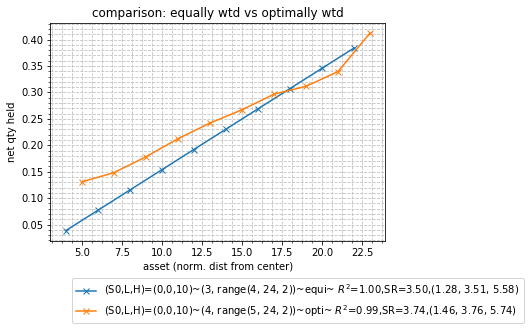

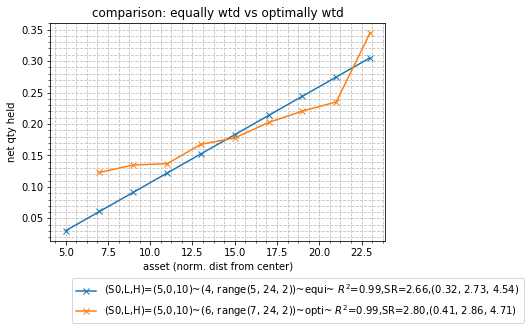


For half_life=<10.0> and type category **<multi_equi>**: strats with top Sharpe
  (S0,L,H)              strat_cd  shortfall    Sharpe  most_likely  windfall        type  center  unit
 (-5,0,10)  (4, range(5, 24, 2))   0.332880  2.686607     2.747294  4.594806  multi_equi    -2.5  0.25
  (0,0,10)  (3, range(4, 23, 2))   1.284745  3.502945     3.506808  5.579773  multi_equi     0.0  0.25
  (5,0,10)  (4, range(5, 24, 2))   0.322487  2.659100     2.726951  4.538755  multi_equi     2.5  0.25

For half_life=<10.0> and type category **<multi_opti>**: strats with top Sharpe
  (S0,L,H)              strat_cd  shortfall    Sharpe  most_likely  windfall        type  center  unit
 (-5,0,10)  (4, range(5, 24, 2))   0.436058  2.808029     2.863865  4.754652  multi_opti    -2.5  0.25
  (0,0,10)  (4, range(5, 24, 2))   1.464757  3.739155     3.764968  5.740760  multi_opti     0.0  0.25
  (5,0,10)  (6, range(7, 24, 2))   0.414966  2.800519     2.859013  4.711278  multi_opti     2.5  0.25

For half_life

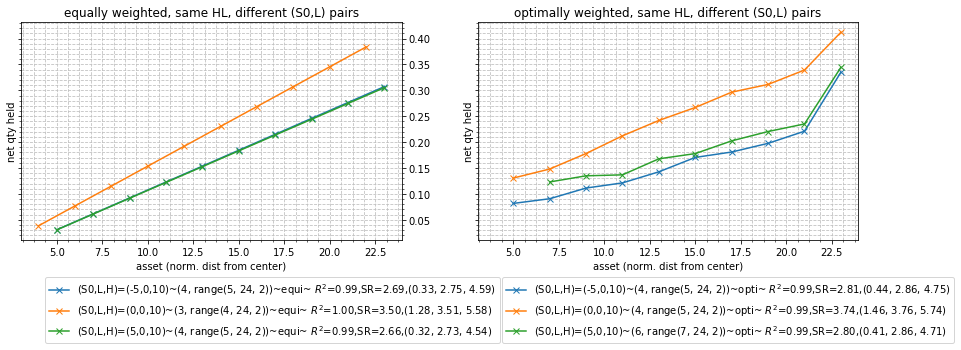

===== half_life=25 === 


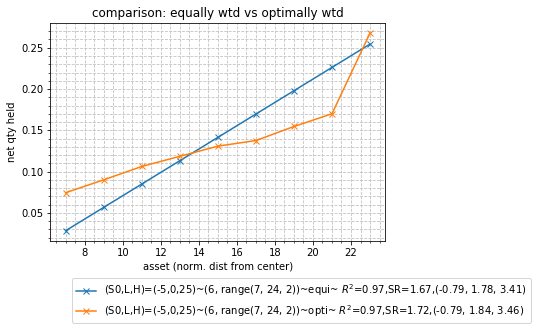

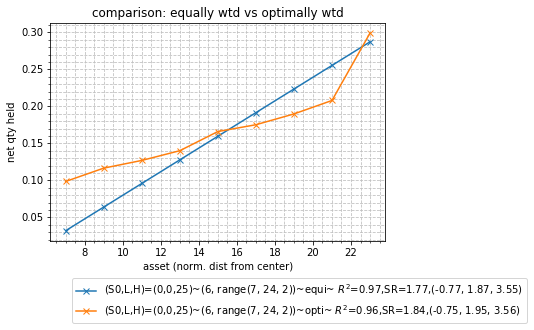

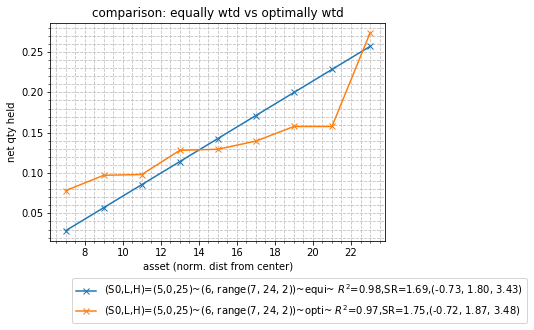


For half_life=<25.0> and type category **<multi_equi>**: strats with top Sharpe
  (S0,L,H)              strat_cd  shortfall    Sharpe  most_likely  windfall        type  center  unit
 (-5,0,25)  (6, range(7, 24, 2))  -0.788103  1.671345     1.782679  3.408031  multi_equi    -2.5  0.25
  (0,0,25)  (6, range(7, 24, 2))  -0.772115  1.773685     1.873248  3.547749  multi_equi     0.0  0.25
  (5,0,25)  (6, range(7, 24, 2))  -0.726790  1.687395     1.799606  3.428437  multi_equi     2.5  0.25

For half_life=<25.0> and type category **<multi_opti>**: strats with top Sharpe
  (S0,L,H)              strat_cd  shortfall    Sharpe  most_likely  windfall        type  center  unit
 (-5,0,25)  (6, range(7, 24, 2))  -0.793911  1.716232     1.835730  3.457912  multi_opti    -2.5  0.25
  (0,0,25)  (6, range(7, 24, 2))  -0.752295  1.835254     1.950658  3.564310  multi_opti     0.0  0.25
  (5,0,25)  (6, range(7, 24, 2))  -0.719275  1.746897     1.867366  3.477647  multi_opti     2.5  0.25

For half_life

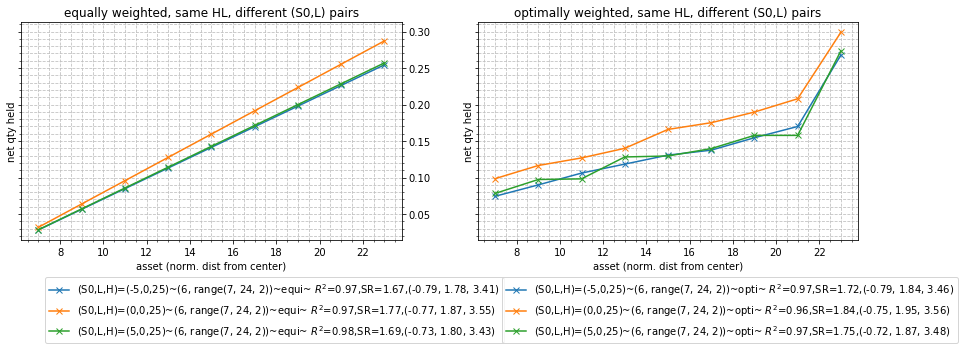

(H=5.00)

Plotting misc ratios: Sharpe, shortfall, most_likely and windfall:


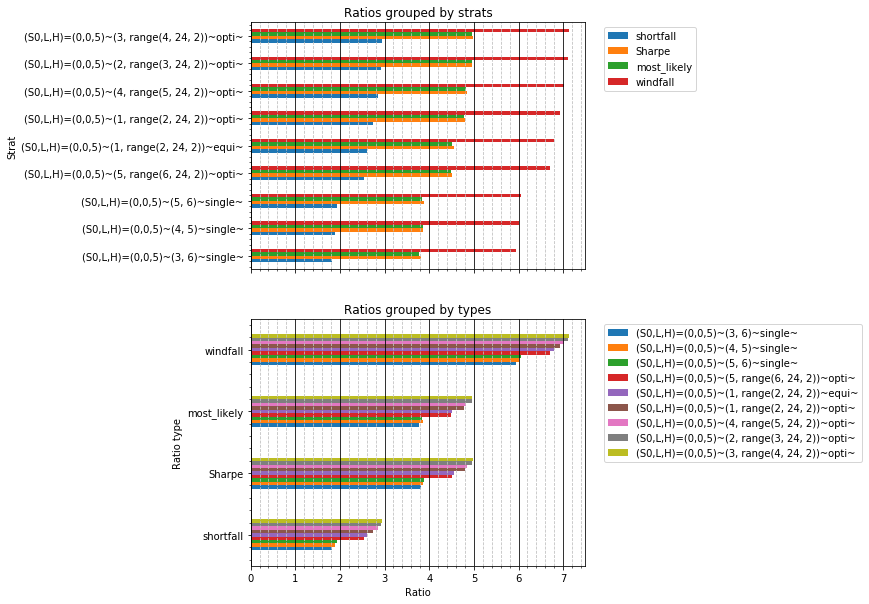

                                         row_id        type    Sharpe  \
36  (S0,L,H)=(0,0,5)~(3, range(4, 24, 2))~opti~  multi_opti  4.975998   
37  (S0,L,H)=(0,0,5)~(2, range(3, 24, 2))~opti~  multi_opti  4.961613   
38  (S0,L,H)=(0,0,5)~(4, range(5, 24, 2))~opti~  multi_opti  4.835448   
39  (S0,L,H)=(0,0,5)~(1, range(2, 24, 2))~opti~  multi_opti  4.798146   
40  (S0,L,H)=(0,0,5)~(1, range(2, 24, 2))~equi~  multi_equi  4.555868   

       QQ_r2  QQ_inter  QQ_slope  open_L  shortfall      mezz  most_likely  \
36  0.998615  4.975998  1.001985       4   2.948460  3.922882     4.956846   
37  0.999058  4.961613  1.001864       3   2.913977  3.906999     4.950196   
38  0.997957  4.835448  1.001674       5   2.846802  3.774409     4.815503   
39  0.999197  4.798146  1.002181       2   2.751541  3.739911     4.788863   
40  0.995892  4.555868  1.000413       2   2.616793  3.507744     4.520453   

    ...        open_iter  N_periods  seed  N_sim  max_hp   S0  level  \
36  ...  range(4, 24

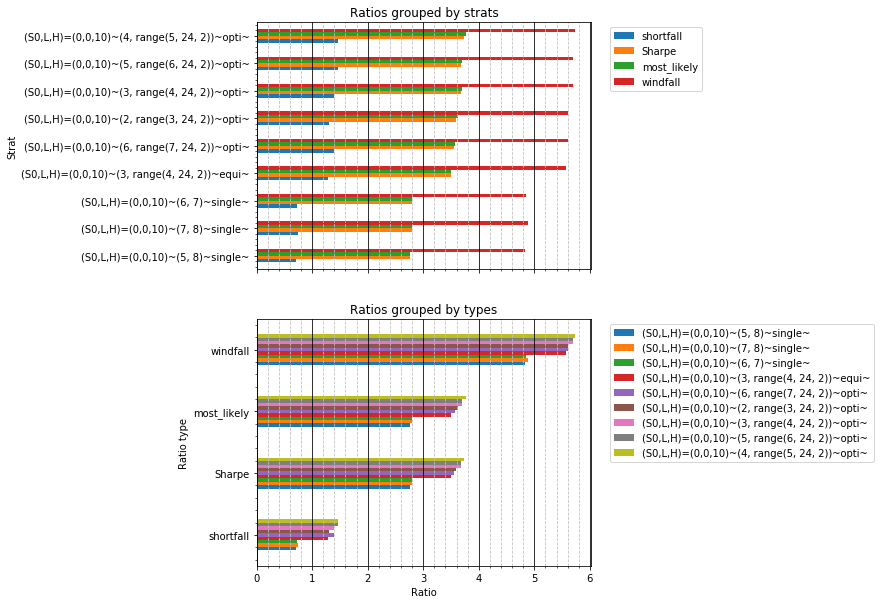

                                          row_id        type    Sharpe  \
36  (S0,L,H)=(0,0,10)~(4, range(5, 24, 2))~opti~  multi_opti  3.739155   
37  (S0,L,H)=(0,0,10)~(5, range(6, 24, 2))~opti~  multi_opti  3.689487   
38  (S0,L,H)=(0,0,10)~(3, range(4, 24, 2))~opti~  multi_opti  3.678936   
39  (S0,L,H)=(0,0,10)~(2, range(3, 24, 2))~opti~  multi_opti  3.593341   
40  (S0,L,H)=(0,0,10)~(6, range(7, 24, 2))~opti~  multi_opti  3.562706   

       QQ_r2  QQ_inter  QQ_slope  open_L  shortfall      mezz  most_likely  \
36  0.993924  3.739155  0.999405       5   1.464757  2.710046     3.764968   
37  0.996226  3.689487  1.000434       6   1.471852  2.650077     3.706251   
38  0.993325  3.678936  0.999119       4   1.389172  2.660151     3.700920   
39  0.993801  3.593341  0.999552       3   1.305685  2.568404     3.618297   
40  0.997929  3.562706  1.001400       7   1.398685  2.520009     3.567540   

    ...        open_iter  N_periods  seed  N_sim  max_hp   S0  level  \
36  ...  range

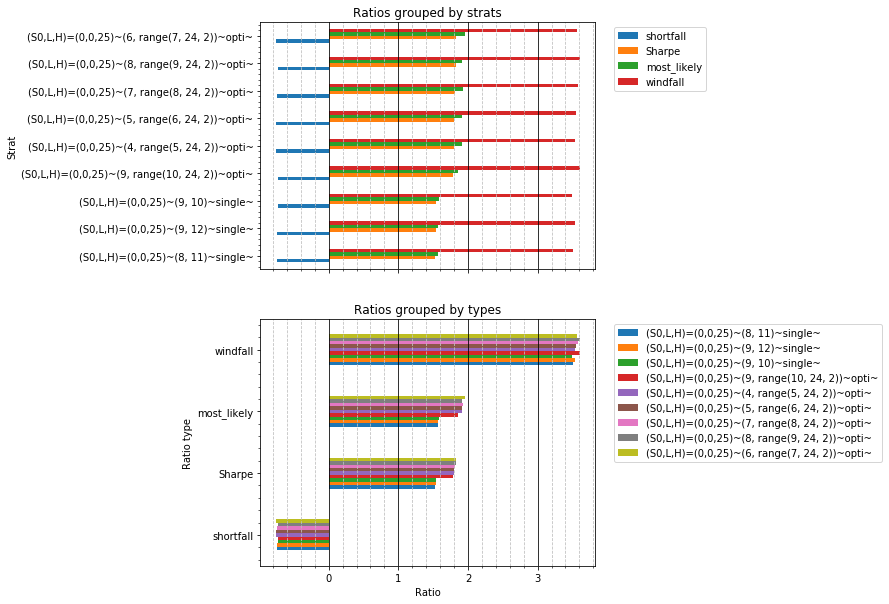

                                          row_id        type    Sharpe  \
36  (S0,L,H)=(0,0,25)~(6, range(7, 24, 2))~opti~  multi_opti  1.835254   
37  (S0,L,H)=(0,0,25)~(8, range(9, 24, 2))~opti~  multi_opti  1.823584   
38  (S0,L,H)=(0,0,25)~(7, range(8, 24, 2))~opti~  multi_opti  1.816276   
39  (S0,L,H)=(0,0,25)~(5, range(6, 24, 2))~opti~  multi_opti  1.805027   
40  (S0,L,H)=(0,0,25)~(4, range(5, 24, 2))~opti~  multi_opti  1.802398   

       QQ_r2  QQ_inter  QQ_slope  open_L  shortfall      mezz  most_likely  \
36  0.962067  1.835254  0.983516       7  -0.752295  0.802697     1.950658   
37  0.968470  1.823584  0.986727       9  -0.731514  0.800871     1.921658   
38  0.966258  1.816276  0.985644       8  -0.742855  0.780458     1.923951   
39  0.965874  1.805027  0.985458       6  -0.750532  0.762067     1.917410   
40  0.964932  1.802398  0.985027       5  -0.760438  0.757186     1.918380   

    ...        open_iter  N_periods  seed  N_sim  max_hp   S0  level  \
36  ...  range

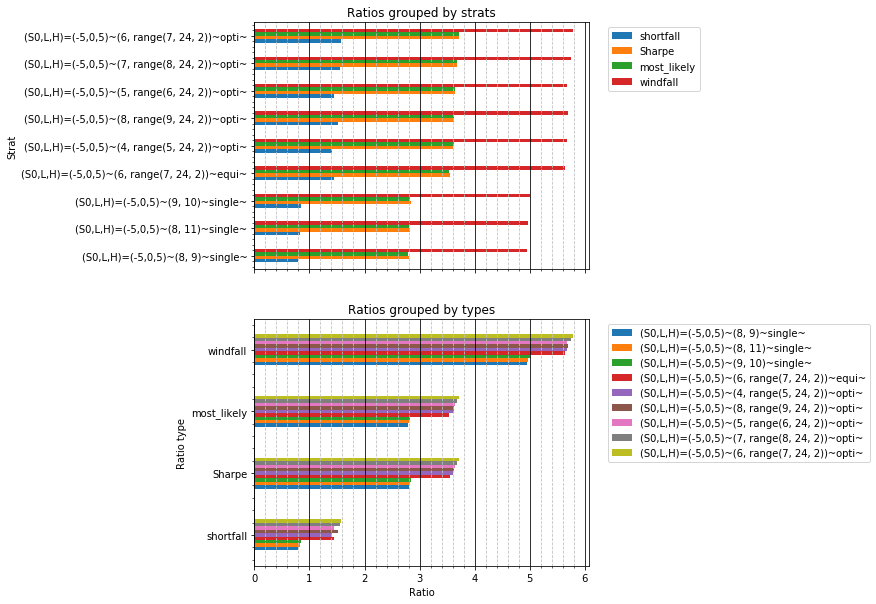

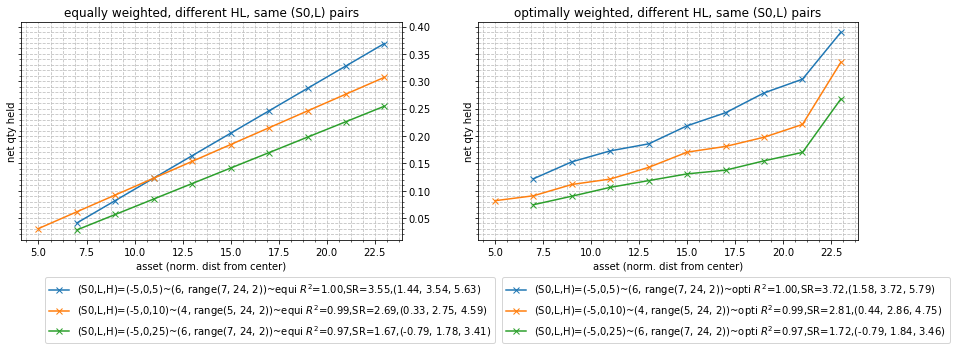

                                          row_id        type    Sharpe  \
18  (S0,L,H)=(-5,0,5)~(6, range(7, 24, 2))~opti~  multi_opti  3.721110   
19  (S0,L,H)=(-5,0,5)~(7, range(8, 24, 2))~opti~  multi_opti  3.684427   
20  (S0,L,H)=(-5,0,5)~(5, range(6, 24, 2))~opti~  multi_opti  3.638995   
21  (S0,L,H)=(-5,0,5)~(8, range(9, 24, 2))~opti~  multi_opti  3.622646   
22  (S0,L,H)=(-5,0,5)~(4, range(5, 24, 2))~opti~  multi_opti  3.609557   

       QQ_r2  QQ_inter  QQ_slope  open_L  shortfall      mezz  most_likely  \
18  0.998503  3.721110  1.001804       7   1.578657  2.678685     3.722369   
19  0.999040  3.684427  1.002038       8   1.560430  2.635121     3.684922   
20  0.997647  3.638995  1.001383       6   1.443590  2.604371     3.646081   
21  0.999372  3.622646  1.002349       9   1.520576  2.567041     3.620879   
22  0.996931  3.609557  1.000846       5   1.406884  2.575231     3.619612   

    ...        open_iter  N_periods  seed  N_sim  max_hp   S0  level  \
18  ...  range

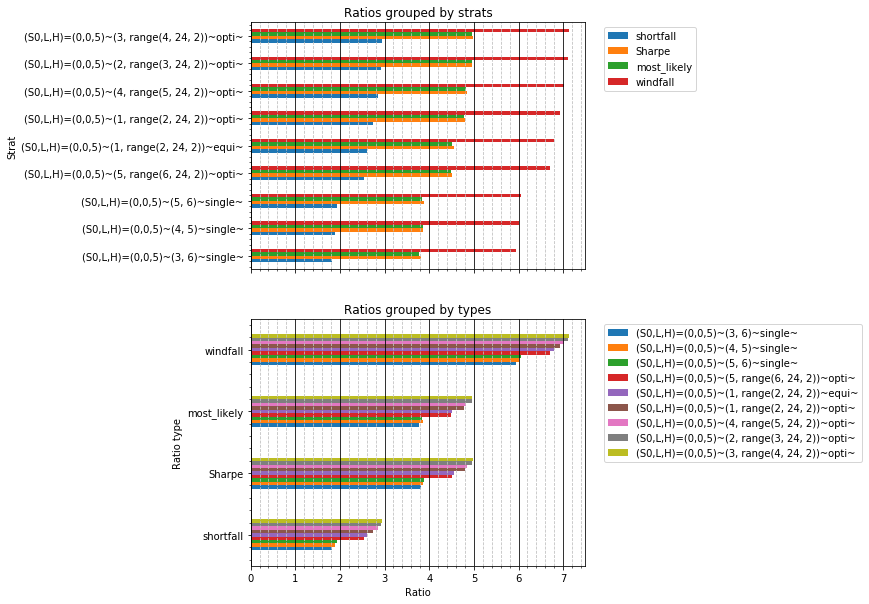

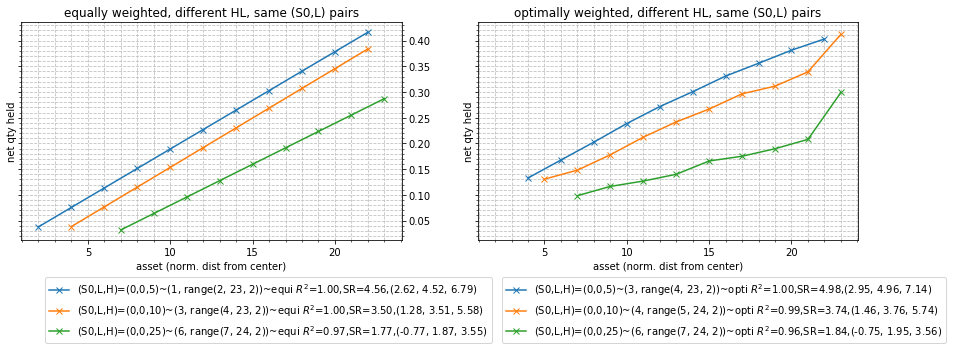

                                         row_id        type    Sharpe  \
36  (S0,L,H)=(0,0,5)~(3, range(4, 24, 2))~opti~  multi_opti  4.975998   
37  (S0,L,H)=(0,0,5)~(2, range(3, 24, 2))~opti~  multi_opti  4.961613   
38  (S0,L,H)=(0,0,5)~(4, range(5, 24, 2))~opti~  multi_opti  4.835448   
39  (S0,L,H)=(0,0,5)~(1, range(2, 24, 2))~opti~  multi_opti  4.798146   
40  (S0,L,H)=(0,0,5)~(1, range(2, 24, 2))~equi~  multi_equi  4.555868   

       QQ_r2  QQ_inter  QQ_slope  open_L  shortfall      mezz  most_likely  \
36  0.998615  4.975998  1.001985       4   2.948460  3.922882     4.956846   
37  0.999058  4.961613  1.001864       3   2.913977  3.906999     4.950196   
38  0.997957  4.835448  1.001674       5   2.846802  3.774409     4.815503   
39  0.999197  4.798146  1.002181       2   2.751541  3.739911     4.788863   
40  0.995892  4.555868  1.000413       2   2.616793  3.507744     4.520453   

    ...        open_iter  N_periods  seed  N_sim  max_hp   S0  level  \
36  ...  range(4, 24

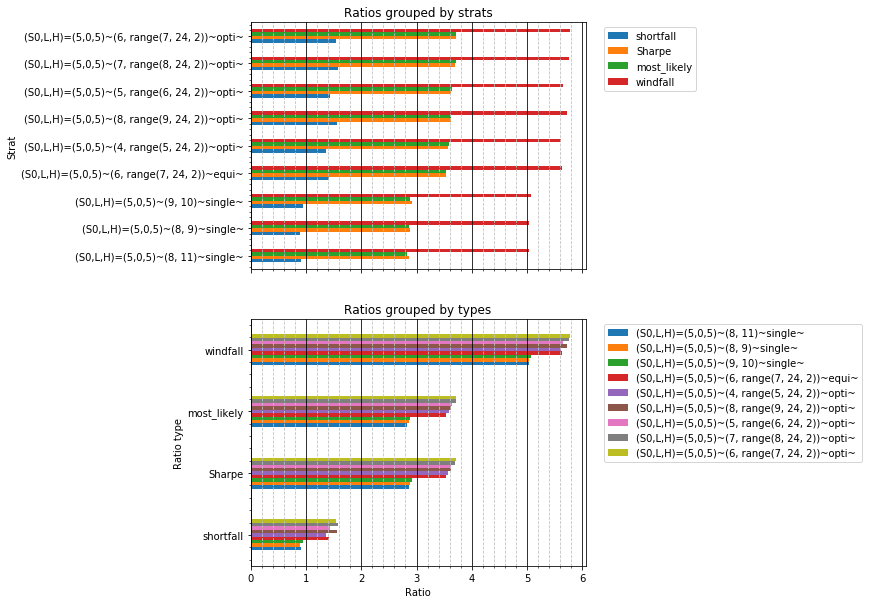

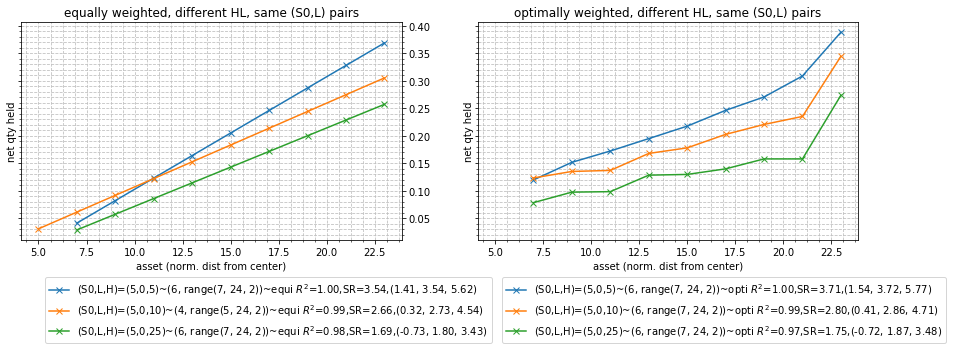

                                        row_id        type    Sharpe  \
0  (S0,L,H)=(5,0,5)~(6, range(7, 24, 2))~opti~  multi_opti  3.707923   
1  (S0,L,H)=(5,0,5)~(7, range(8, 24, 2))~opti~  multi_opti  3.704913   
2  (S0,L,H)=(5,0,5)~(5, range(6, 24, 2))~opti~  multi_opti  3.626289   
3  (S0,L,H)=(5,0,5)~(8, range(9, 24, 2))~opti~  multi_opti  3.626280   
4  (S0,L,H)=(5,0,5)~(4, range(5, 24, 2))~opti~  multi_opti  3.571681   

      QQ_r2  QQ_inter  QQ_slope  open_L  shortfall      mezz  most_likely  \
0  0.998024  3.707923  1.001585       7   1.537614  2.660781     3.720411   
1  0.999152  3.704913  1.002142       8   1.582911  2.646963     3.711154   
2  0.997547  3.626289  1.001331       6   1.428206  2.569855     3.647520   
3  0.999326  3.626280  1.002349       9   1.563758  2.573663     3.615446   
4  0.997266  3.571681  1.001229       5   1.358467  2.527967     3.589142   

   ...        open_iter  N_periods  seed  N_sim  max_hp   S0  level half_life  \
0  ...  range(7, 24, 2)

In [0]:
import seaborn as sns

def  sep_single_vs_non_single(df):
  
  flag_ = 'ertdf'
  assert flag_ not in df.columns
  df[flag_] = [row.startswith('single') for row in df['type']]
  
  df_s = df[True ==df[flag_]].copy() # need this copy
  df_m = df[False==df[flag_]].copy() # need this copy
  
  df.drop(columns=[flag_],inplace=True)
  df_s.drop(columns=[flag_],inplace=True)
  df_m.drop(columns=[flag_],inplace=True)

  return (df_s,df_m)
#end def

def pick_top_few_wts_for_plotting(
    S0,level,std_normal_mult,half_life,
    df, 
    Q_equi_, Q_opti_
):
  #-----------------
  #
  #-----------------
  df_z = df.copy()
  df_z.sort_values(['Sharpe'], ascending=False,inplace=True)
  df_y = df_z #.head()
  #print('df_y:\n',df_y)
  #-----------------

  #-----------------
  #
  #-----------------
  (type_single, type_multi_equi, type_multi_opti) = get_type_tags()
  X_Y_iter_equi, equi_SR_iter = [], []
  X_Y_iter_opti, opti_SR_iter = [], []
  for (close_,  open_L,  open_H,   open_S), df_c in df_y.groupby(
      ['close_','open_L','open_H', 'open_S']
  ):
    open_iter = range(open_L,int(open_H),int(open_S))
    (this_single_tags, this_multi_tag) = get_my_tag(S0, level, half_life, std_normal_mult, close_, open_iter)

    debug_flag = False
    fill_X_Y_iter_equi_opti(
        df_c, this_multi_tag, open_iter,
        type_multi_equi, X_Y_iter_equi,equi_SR_iter,
        type_multi_opti, X_Y_iter_opti,opti_SR_iter,
        debug_flag, False
    )
  #end for
  #-----------------
  
  #-----------------
  #
  #-----------------
  for (Q_,      X_Y_iter,      SR_iter) in [
      (Q_equi_, X_Y_iter_equi, equi_SR_iter), 
      (Q_opti_, X_Y_iter_opti, opti_SR_iter)
  ]:
    rng_ = range(len(X_Y_iter))
    k_   = np.argsort(SR_iter)[rng_]
    __A = [X_Y_iter[i_] for i_ in k_]
    __B = [ SR_iter[i_] for i_ in k_]
    assert  is_increasing(__B)
    Q_.extend(__A[-1:])
  #end for
  #-----------------

#end def

from math import isnan
def f_each_row(row_id2, wt_vec, close_, open_L, open_H, open_S):
  #----------------
  #
  #----------------
  wt_arr = None
  if isinstance(wt_vec,str):
    wt_arr = from_string_to_array(wt_vec)
  else:
    assert isnan(wt_vec)
  #end if
  #----------------
  
  #----------------
  #
  #----------------
  X_Y_pair = None
  if wt_arr is not None:
    open_iter = range(open_L, int(open_H), int(open_S))
    assert len(open_iter) == wt_arr.size
    X_Y_pair = (open_iter, wt_arr.cumsum(), row_id2, 'x')
  else:
    ; #print('arr is None')
  #end if
  #----------------
  
  return X_Y_pair
#end if

def run_rep_plot(df):
  
  cols_ = ['row_id2', 'wt_vec','close_', 'open_L', 'open_H', 'open_S']
  X_Y_pair_iter = [f_each_row(*row) for row in df[cols_].values]
  
  return X_Y_pair_iter
#end def

def add_proc_id(df, proc_cd= '(S0,L,H)'):
  col_list = ['S0', 'level', 'half_life', 'std_normal_mult']
  df[proc_cd] = [get_my_tag_proc(*row) for row in df[col_list].values]
#end def


def get_my_tag_strat(close_, open_L, open_H, open_S, type_ , row_id):
  
  tag_ = None
  if 'single'==type_:
    tag_ = get_my_tag_single(close_, open_L)
  else:
    open_iter = range(open_L, int(open_H), int(open_S))
    tag_ = get_my_tag_multi(close_, open_iter)
  #end if
  return tag_
#end def
def add_strat_id(df, strat_cd='strat_id'):
  col_list = ['close_', 'open_L', 'open_H', 'open_S', 'type' , 'row_id']
  df[strat_cd] = [get_my_tag_strat(*row) for row in df[col_list].values]
  
#end def

def run_report_single_half_life_A(half_life, df_):
  (xlabel,ylabel) = get_common_xy_labels()

  print('================')
  print('===== half_life=%.f === ' % half_life)
  print('================')
  SR_ ='Sharpe'
  
  #-------------------------
  #
  #-------------------------
  for (S0,   level,  std_normal_mult), df_p in df_.groupby(
      ['S0','level','std_normal_mult']
  ):
    #-----------------------
    #
    #-----------------------
    frames = []
    for (type_), df_q in df_p.groupby(['type']):
      df_cc = df_q.copy()
      df_cc.sort_values([SR_], ascending=[True],inplace=True)
      frames.append(df_cc.tail(1))
    #end for (loop over type)
    df_m = pd.concat(frames)
    X_Y_pair_iter = run_rep_plot(df_m)
    #-----------------------
    
    #-----------------------
    #
    #-----------------------
    if X_Y_pair_iter is not None:
      for X_Y_pair_ in X_Y_pair_iter:
        if X_Y_pair_ is not None:
          (X_,Y_,label_,marker_) = X_Y_pair_
          plt.plot(X_,Y_,label=label_,marker=marker_)
        #end if
      #end for
      show_grid(plt)
      show_label_title(plt,xlabel,ylabel, 'comparison: equally wtd vs optimally wtd')
      bbox_to_anchor=(0.05, -0.15)
      plt.legend(bbox_to_anchor=bbox_to_anchor,loc='upper left')
      plt.show()
    #end if
    #-----------------------
  #end for
  #-------------------------

  #-------------------------
  # looping over all 'types': single, mulit ...
  #-------------------------
  X_Y_pair_iter_dict = {}
  for (type_), df_b in df_.groupby(['type']):
    frames = []
    for (S0,   level,  std_normal_mult), df_c in df_b.groupby(
        ['S0','level','std_normal_mult']
    ):
      df_cc = df_c.copy()
      df_cc.sort_values([SR_], ascending=[True],inplace=True)
      frames.append(df_cc.tail(1))
    #end for
    df_m = pd.concat(frames)
    
    proc_cd = '(S0,L,H)'
    add_proc_id(df_m, proc_cd)
    
    strat_cd = 'strat_cd'
    add_strat_id(df_m, strat_cd)
    
    cols_ = [
       proc_cd,  strat_cd,
       'shortfall',  'Sharpe',  'most_likely',  'windfall', 'type', 'center', 'unit'
       
    ]
    df_n = df_m[cols_]
    print('\nFor half_life=<%.1f> and type category **<%s>**: strats with top Sharpe'%(half_life,type_))
    print(df_n.to_string(index=False))
    
    
    X_Y_pair_iter = run_rep_plot(df_m)
    X_Y_pair_iter_dict[type_] = X_Y_pair_iter
  #end for
  #--------- end of loop over 'type's ----------------

  #-------------------------
  # plot
  #-------------------------
  X_Y_iter_equi = X_Y_pair_iter_dict['multi_equi']
  X_Y_iter_opti = X_Y_pair_iter_dict['multi_opti']

  title_equi =   'equally weighted, same HL, different (S0,L) pairs'
  title_opti = 'optimally weighted, same HL, different (S0,L) pairs'
  plot_X_Y_iter_init_opti(X_Y_iter_equi, X_Y_iter_opti, title_equi, title_opti)
  #-------------------------

#end def

def run_report_single_half_life_B(half_life, df_):

  #-----------------
  #
  #-----------------
  print('===============')
  print('(H=%.2f)'% (half_life))
  print('===============')
  df_x = df_.copy() # need this copy
  #-----------------

  #-----------------
  #
  #-----------------
  if 1==1:
    (df_x_s,df_x_m) = sep_single_vs_non_single(df_x)
    plot_Sharpe_ratios(df_x_s, df_x_m)
  #end if
  #-----------------

  #-----------------
  #
  #-----------------
  #-----------------

  print(df_x.head())
  #--------------------------
#end def

def run_report_single_S0_level_std_normal_mult(S0,level,std_normal_mult,df__):
  #--------------------------
  #
  #--------------------------
  print('===============')
  print('(S0=%.2f,  levele=%.2f,  std_normal_mult=%.2f)'% (S0,  level,  std_normal_mult))
  print('===============')
  df_x = df__.copy() # need this copy
  (df_x_s,df_x_m) = sep_single_vs_non_single(df_x)
  plot_Sharpe_ratios(df_x_s, df_x_m)

  Q_equi,Q_opti = [], []
  for (half_life), df_b in df_x.groupby(['half_life']):
    pick_top_few_wts_for_plotting(
        S0,level,std_normal_mult,half_life,
        df_b, 
        Q_equi, Q_opti
    )
  #end for

  assert 0 < len(Q_equi)
  assert 0 < len(Q_opti)
  title_equi = 'equally weighted, different HL, same (S0,L) pairs'
  title_opti = 'optimally weighted, different HL, same (S0,L) pairs'
  plot_X_Y_iter_init_opti(Q_equi, Q_opti, title_equi, title_opti)

  print(df_x.head())
  #--------------------------
#end def


def run_report_df(df):
  
  (Nr,Nc) = df.shape
  assert Nr == df['row_id'].nunique()
  print('\nrun_report_df::df.shape:(%d,%d)' % (Nr,Nc))
  
  #-------------------------
  # create a new col 'row_id2' to pack more additional info, e.g. R^2, various ratios etc
  #-------------------------
  col_fmt_pair_iter = get_col_fmt_pair_iter()
  row_id2 = 'row_id2'
  df[row_id2] = df['row_id']
  for (col_,fmt_) in col_fmt_pair_iter:
    df[row_id2] += [fmt_%row_ for row_ in  df[col_].values]
  #end for
  #-------------------------
  
  #-------------------------
  # looping over all 'half_life's
  #-------------------------
  for (half_life), df_a in df.groupby(['half_life']):
    run_report_single_half_life_A(half_life, df_a)
  #end for
  for (half_life), df_b in df.groupby(['half_life']):
    run_report_single_half_life_B(half_life, df_b)
  #end for
  #---------- end of loop over 'half_life's -----------

  #-------------------------
  # looping over all '(S0,   level,  std_normal_mult)'s
  #-------------------------
  if 1==1:
    for (S0,   level,  std_normal_mult), df_a in df.groupby(
        ['S0','level','std_normal_mult']
    ):
      run_report_single_S0_level_std_normal_mult(S0,level,std_normal_mult,df_a)
    #end for
  #end if
  #-------------------------

#end def

#-------------------------
#
#-------------------------
def flatten_aggregated_dataframe(
    gdf, concat_name=True, concat_separator=' ', name_level=1, inplace=False):
    """
    Flatten aggregated DataFrame.
    https://intoli.com/blog/pandas-aggregation/

    Args:
        gdf: DataFrame obtained through aggregation.
        concat_name: Whether to concatenate original column name and
            aggregation function name in the case of MultiIndex columns.
        concat_separator: Which string to place between original column name
            and aggregation function name if concat_name is True.
        name_level: Which element of a column tuple to use in the case of 
            MultiIndex columns and concat_name == False. Should be 0 for 
            original column name and 1 for aggregation function name.
        inplace: Whether to modify the aggregated DataFrame directly 
            (or return a copy).
    """
    if not inplace:
        gdf = gdf.copy()
    if type(gdf.columns) == pd.core.index.MultiIndex:
        if concat_name:
            columns = [concat_separator.join(col) for col in gdf.columns]
        else:
            columns = [col[name_level % 2] for col in gdf.columns]
        gdf.columns = columns
    return gdf.reset_index()
#-------------------------
def calc_df_summ(df_):
  cols_ = [ 
      'max_hp', 'N_sim', 'unit', 'center', 
      'S0', 'level', 'half_life'
      ,'type' 
  ]
  cols_b = cols_[:]; cols_b.extend(['Sharpe'])
  
  df_max = df_[cols_b].groupby(cols_).max()
  unstack_l= ['half_life']; df_summ_hl = df_max.unstack(unstack_l)
  unstack_l= ['type'];      df_summ_tp = df_max.unstack(unstack_l)
  return (df_summ_hl, df_summ_tp)
#end def

def run_report_df2(df):
  (df_summ_hl, df_summ_tp) = calc_df_summ(df)

  if 1==1:
    print('\n===========')
    print('==== Summary 1 =======')
    print('===========')
    print(df_summ_hl)
  #end if

  if 1==1:
    print('\n===========')
    print('==== Summary 2 =======')
    print('===========')
    df_summ_tp = flatten_aggregated_dataframe(df_summ_tp)
    tablefmt='github' # possibilities: 'github' 'fancy_grid' 'psql' 'orgtbl'
    print(tabulate(df_summ_tp, headers='keys', tablefmt=tablefmt))
  #end if
#end def

#--------------------------
#
#--------------------------
def run_report():
  df_s_iter, df_m_iter = [], []
  for i in range(3):

    post_ = '_%d'%i
    (file_s, file_m) = get_file_names(post_)

    df_s_ = pd.read_csv(file_s); (Nr_s, Nc_s) = df_s_.shape
    df_m_ = pd.read_csv(file_m); (Nr_m, Nc_m) = df_m_.shape
    print('%s::(Nr_s, Nc_s)=(%d,%d)' % (file_s, Nr_s, Nc_s))
    print('%s::(Nr_m, Nc_m)=(%d,%d)'% (file_m, Nr_m, Nc_m))
    df_s_iter.append(df_s_)
    df_m_iter.append(df_m_)
  #end for
  df_s_all = pd.concat(df_s_iter)
  df_m_all = pd.concat(df_m_iter)
  #--------------------------

  #--------------------------
  #
  #--------------------------
  df_all = pd.concat([ df_s_all, df_m_all])
  df_all.sort_values(['Sharpe'], ascending=False,inplace=True)
  (type_single, type_multi_equi, type_multi_opti) = get_type_tags()

  run_report_df2(df_all)
  if 1==1:
    run_report_df(df_all)
  #end if
  
#end def



#-------------------------
run_report()
#--------------------------


In [0]:
print((dt.now() - timedelta(hours=4)).strftime(' %Y %m %d %a  [%I:%M:%S]%p'))

 2019 05 12 Sun  [12:30:49]AM
